# FIFA PROJECT: Creating a model to predict general score of players based on other features

In [1]:
# Importing the libraries I need

import pandas as pd
import numpy as np

In [2]:
# Reading the file where our data is

fifa = pd.read_csv('fifa21_train.csv')
fifa

ID            Name  Age  Nationality                        Club  \
0      184383       A. Pasche   26  Switzerland           FC Lausanne-Sport   
1      188044   Alan Carvalho   30     China PR     Beijing Sinobo Guoan FC   
2      184431     S. Giovinco   33        Italy                    Al Hilal   
3      233796        J. Evans   22        Wales                Swansea City   
4      234799      Y. Demoncy   23       France  US Orléans Loiret Football   
...       ...             ...  ...          ...                         ...   
11696  232504   B. Böðvarsson   25      Iceland       Jagiellonia Białystok   
11697  214680       G. Gallon   27       France                ESTAC Troyes   
11698  221489       J. Flores   22        Chile              CD Antofagasta   
11699  146717  Anderson Silva   26       Brazil                    Barnsley   
11700  236507     T. Conechny   22    Argentina            Portland Timbers   

        BP   Position                               Team & Contract Height  \
0       CM     CM CDM                 FC Lausanne-Sport 2015 ~ 2020   5'9"   
1       ST   ST LW LM  Beijing Sinobo Guoan FC Dec 31, 2020 On Loan   6'0"   
2      CAM     CAM CF                          Al Hilal 2019 ~ 2022   5'4"   
3      CDM     CDM CM                      Swansea City 2016 ~ 2021  5'10"   
4      CDM     CDM CM        US Orléans Loiret Football 2018 ~ 2021  5'11"   
...    ...        ...                                           ...    ...   
11696   LB         LB             Jagiellonia Białystok 2018 ~ 2021   6'1"   
11697   GK         GK                      ESTAC Troyes 2019 ~ 2022   6'1"   
11698   RM  LM CAM RM                    CD Antofagasta 2019 ~ 2024   5'6"   
11699   CM        NaN                                 Barnsley 2010   6'2"   
11700  CAM  ST CAM LM                  Portland Timbers 2019 ~ 2020   5'7"   

       Weight  ...   CDM   RDM   RWB    LB   LCB    CB   RCB    RB    GK  OVA  
0      161lbs  ...  59+1  59+1  59+1  58+1  54+1  54+1  54+1  58+1  15+1   64  
1      159lbs  ...  53+2  53+2  57+2  53+2  48+2  48+2  48+2  53+2  18+2   77  
2      134lbs  ...  56+2  56+2  59+2  53+2  41+2  41+2  41+2  53+2  12+2   80  
3      152lbs  ...  58+2  58+2  56+2  57+2  58+2  58+2  58+2  57+2  14+2   59  
4      150lbs  ...  64+2  64+2  64+2  63+2  61+2  61+2  61+2  63+2  15+2   65  
...       ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  
11696  168lbs  ...  60+2  60+2  63+2  63+2  61+2  61+2  61+2  63+2  16+2   65  
11697  174lbs  ...  26+2  26+2  25+2  24+2  26+2  26+2  26+2  24+2  69+2   70  
11698  143lbs  ...  44+2  44+2  49+2  45+2  35+2  35+2  35+2  45+2  17+2   67  
11699  179lbs  ...  68+0  68+0  66+0  64+0  60+0  60+0  60+0  64+0  25+0   68  
11700  143lbs  ...  43+2  43+2  46+2  44+2  36+2  36+2  36+2  44+2  15+2   64  

[11701 rows x 101 columns]

In [3]:
# I change all the columns to lowercase and I replace the ' ' by '_'

fifa.columns = fifa.columns.str.lower()
fifa.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
fifa.head()

id           name  age  nationality                        club   bp  \
0  184383      A. Pasche   26  Switzerland           FC Lausanne-Sport   CM   
1  188044  Alan Carvalho   30     China PR     Beijing Sinobo Guoan FC   ST   
2  184431    S. Giovinco   33        Italy                    Al Hilal  CAM   
3  233796       J. Evans   22        Wales                Swansea City  CDM   
4  234799     Y. Demoncy   23       France  US Orléans Loiret Football  CDM   

   position                               team_&_contract height  weight  ...  \
0    CM CDM                 FC Lausanne-Sport 2015 ~ 2020   5'9"  161lbs  ...   
1  ST LW LM  Beijing Sinobo Guoan FC Dec 31, 2020 On Loan   6'0"  159lbs  ...   
2    CAM CF                          Al Hilal 2019 ~ 2022   5'4"  134lbs  ...   
3    CDM CM                      Swansea City 2016 ~ 2021  5'10"  152lbs  ...   
4    CDM CM        US Orléans Loiret Football 2018 ~ 2021  5'11"  150lbs  ...   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb    gk  ova  
0  59+1  59+1  59+1  58+1  54+1  54+1  54+1  58+1  15+1   64  
1  53+2  53+2  57+2  53+2  48+2  48+2  48+2  53+2  18+2   77  
2  56+2  56+2  59+2  53+2  41+2  41+2  41+2  53+2  12+2   80  
3  58+2  58+2  56+2  57+2  58+2  58+2  58+2  57+2  14+2   59  
4  64+2  64+2  64+2  63+2  61+2  61+2  61+2  63+2  15+2   65  

[5 rows x 101 columns]

In [4]:
pd.set_option('display.max_columns', 101)
fifa

id            name  age  nationality                        club  \
0      184383       A. Pasche   26  Switzerland           FC Lausanne-Sport   
1      188044   Alan Carvalho   30     China PR     Beijing Sinobo Guoan FC   
2      184431     S. Giovinco   33        Italy                    Al Hilal   
3      233796        J. Evans   22        Wales                Swansea City   
4      234799      Y. Demoncy   23       France  US Orléans Loiret Football   
...       ...             ...  ...          ...                         ...   
11696  232504   B. Böðvarsson   25      Iceland       Jagiellonia Białystok   
11697  214680       G. Gallon   27       France                ESTAC Troyes   
11698  221489       J. Flores   22        Chile              CD Antofagasta   
11699  146717  Anderson Silva   26       Brazil                    Barnsley   
11700  236507     T. Conechny   22    Argentina            Portland Timbers   

        bp   position                               team_&_contract height  \
0       CM     CM CDM                 FC Lausanne-Sport 2015 ~ 2020   5'9"   
1       ST   ST LW LM  Beijing Sinobo Guoan FC Dec 31, 2020 On Loan   6'0"   
2      CAM     CAM CF                          Al Hilal 2019 ~ 2022   5'4"   
3      CDM     CDM CM                      Swansea City 2016 ~ 2021  5'10"   
4      CDM     CDM CM        US Orléans Loiret Football 2018 ~ 2021  5'11"   
...    ...        ...                                           ...    ...   
11696   LB         LB             Jagiellonia Białystok 2018 ~ 2021   6'1"   
11697   GK         GK                      ESTAC Troyes 2019 ~ 2022   6'1"   
11698   RM  LM CAM RM                    CD Antofagasta 2019 ~ 2024   5'6"   
11699   CM        NaN                                 Barnsley 2010   6'2"   
11700  CAM  ST CAM LM                  Portland Timbers 2019 ~ 2020   5'7"   

       weight   foot  growth        joined loan_date_end  value  wage  \
0      161lbs  Right       1   Jul 1, 2015           NaN  €525K   €4K   
1      159lbs  Right       0  Jan 16, 2015  Dec 31, 2020  €8.5M  €23K   
2      134lbs  Right       0  Jan 31, 2019           NaN    €9M  €49K   
3      152lbs  Right      13   Jul 1, 2016           NaN  €275K   €4K   
4      150lbs  Right       8   Jul 1, 2018           NaN  €725K   €2K   
...       ...    ...     ...           ...           ...    ...   ...   
11696  168lbs   Left       5   Feb 8, 2018           NaN  €625K   €3K   
11697  174lbs  Right       4   Jul 1, 2019           NaN  €1.6M   €4K   
11698  143lbs  Right       8  Jan 23, 2019           NaN  €1.1M   €2K   
11699  179lbs  Right       7           NaN           NaN     €0    €0   
11700  143lbs   Left       9  Jul 22, 2019           NaN  €700K   €2K   

      release_clause              contract  attacking  crossing  finishing  \
0              €801K           2015 ~ 2020        258        54         47   
1                 €0  Dec 31, 2020 On Loan        365        66         79   
2             €15.3M           2019 ~ 2022        336        73         76   
3              €694K           2016 ~ 2021        242        44         42   
4              €1.4M           2018 ~ 2021        249        49         37   
...              ...                   ...        ...       ...        ...   
11696          €891K           2018 ~ 2021        224        62         24   
11697          €2.9M           2019 ~ 2022         84        12         14   
11698          €1.7M           2019 ~ 2024        286        64         66   
11699             €0                  2010        254        64         66   
11700          €1.2M           2019 ~ 2020        289        43         64   

       heading_accuracy  short_passing  volleys  skill  dribbling  curve  \
0                    43             70     44.0    286         61   44.0   
1                    76             68     76.0    375         83   78.0   
2                    34             78     75.0    424         85   89.0   
3      

In [5]:
# Column team & contract is redundant, so I will delete it

fifa = fifa.drop(['team_&_contract'], axis=1)
fifa

id            name  age  nationality                        club  \
0      184383       A. Pasche   26  Switzerland           FC Lausanne-Sport   
1      188044   Alan Carvalho   30     China PR     Beijing Sinobo Guoan FC   
2      184431     S. Giovinco   33        Italy                    Al Hilal   
3      233796        J. Evans   22        Wales                Swansea City   
4      234799      Y. Demoncy   23       France  US Orléans Loiret Football   
...       ...             ...  ...          ...                         ...   
11696  232504   B. Böðvarsson   25      Iceland       Jagiellonia Białystok   
11697  214680       G. Gallon   27       France                ESTAC Troyes   
11698  221489       J. Flores   22        Chile              CD Antofagasta   
11699  146717  Anderson Silva   26       Brazil                    Barnsley   
11700  236507     T. Conechny   22    Argentina            Portland Timbers   

        bp   position height  weight   foot  growth        joined  \
0       CM     CM CDM   5'9"  161lbs  Right       1   Jul 1, 2015   
1       ST   ST LW LM   6'0"  159lbs  Right       0  Jan 16, 2015   
2      CAM     CAM CF   5'4"  134lbs  Right       0  Jan 31, 2019   
3      CDM     CDM CM  5'10"  152lbs  Right      13   Jul 1, 2016   
4      CDM     CDM CM  5'11"  150lbs  Right       8   Jul 1, 2018   
...    ...        ...    ...     ...    ...     ...           ...   
11696   LB         LB   6'1"  168lbs   Left       5   Feb 8, 2018   
11697   GK         GK   6'1"  174lbs  Right       4   Jul 1, 2019   
11698   RM  LM CAM RM   5'6"  143lbs  Right       8  Jan 23, 2019   
11699   CM        NaN   6'2"  179lbs  Right       7           NaN   
11700  CAM  ST CAM LM   5'7"  143lbs   Left       9  Jul 22, 2019   

      loan_date_end  value  wage release_clause              contract  \
0               NaN  €525K   €4K          €801K           2015 ~ 2020   
1      Dec 31, 2020  €8.5M  €23K             €0  Dec 31, 2020 On Loan   
2               NaN    €9M  €49K         €15.3M           2019 ~ 2022   
3               NaN  €275K   €4K          €694K           2016 ~ 2021   
4               NaN  €725K   €2K          €1.4M           2018 ~ 2021   
...             ...    ...   ...            ...                   ...   
11696           NaN  €625K   €3K          €891K           2018 ~ 2021   
11697           NaN  €1.6M   €4K          €2.9M           2019 ~ 2022   
11698           NaN  €1.1M   €2K          €1.7M           2019 ~ 2024   
11699           NaN     €0    €0             €0                  2010   
11700           NaN  €700K   €2K          €1.2M           2019 ~ 2020   

       attacking  crossing  finishing  heading_accuracy  short_passing  \
0            258        54         47                43             70   
1            365        66         79                76             68   
2            336        73         76                34             78   
3            242        44         42                58             62   
4            249        49         37                61             68   
...          ...       ...        ...               ...            ...   
11696        224        62         24                51             59   
11697         84        12         14                13             29   
11698        286        64         66                51             64   
11699        254        64         66                51             73   
11700        289        43         64                65             64   

       volleys  skill  dribbling  curve  fk_accuracy  long_passing  \
0         44.0    286         61   44.0           55            63   
1         76.0    375         83   78.0           72            63   
2         75.0    424         85   89.0           91            74   
3         36.0    259         54   41.0           46            57   
4         34.0    280         64   44.0           45            61   
...        ...    ...        ...    ...        

In [6]:
# I want to know which are the unique values of each column to check consistency

for column in fifa.columns:
    unique_values = fifa[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in id: [184383 188044 184431 ... 221489 146717 236507]
Unique values in name: ['A. Pasche' 'Alan Carvalho' 'S. Giovinco' ... 'G. Gallon'
 'Anderson Silva' 'T. Conechny']
Unique values in age: [26 30 33 22 23 34 35 37 21 27 17 28 25 24 18 20 29 32 19 31 38 36 39 42
 40 41 16 43]
Unique values in nationality: ['Switzerland' 'China PR' 'Italy' 'Wales' 'France' 'Bosnia Herzegovina'
 'Argentina' 'Paraguay' 'Uruguay' 'United States' 'Mexico' 'Chile'
 'Germany' 'Nigeria' 'Spain' 'Norway' 'Russia' 'England'
 'Republic of Ireland' 'Cape Verde' 'Bulgaria' 'Zambia' 'Honduras'
 'Albania' 'Finland' 'Ghana' 'Japan' 'Cameroon' 'Peru' 'Austria' 'Congo'
 'Colombia' 'Belgium' 'Brazil' 'Korea Republic' 'Hungary' 'Morocco'
 'Kosovo' 'Netherlands' 'Sweden' 'Scotland' 'Denmark' 'Northern Ireland'
 'Turkey' 'Poland' 'Ivory Coast' 'Bolivia' 'Ukraine' 'Ecuador' 'Malaysia'
 'DR Congo' 'Mali' 'Romania' 'Slovenia' 'United Arab Emirates' 'Australia'
 'Venezuela' 'Montenegro' 'Slovakia' 'Curacao' 'Por

In [7]:
fifa_dtypes = fifa.dtypes.to_frame(name='data_types').T
fifa_dtypes

id    name    age nationality    club      bp position  height  \
data_types  int64  object  int64      object  object  object   object  object   

            weight    foot growth  joined loan_date_end   value    wage  \
data_types  object  object  int64  object        object  object  object   

           release_clause contract attacking crossing finishing  \
data_types         object   object     int64    int64     int64   

           heading_accuracy short_passing  volleys  skill dribbling    curve  \
data_types            int64         int64  float64  int64     int64  float64   

           fk_accuracy long_passing ball_control movement acceleration  \
data_types       int64        int64        int64    int64        int64   

           sprint_speed  agility reactions  balance  power shot_power  \
data_types        int64  float64     int64  float64  int64      int64   

            jumping stamina strength long_shots mentality aggression  \
data_types  float64   int64    int64      int64     int64      int64   

           interceptions positioning   vision penalties composure defending  \
data_types       float64     float64  float64     int64   float64     int64   

           marking standing_tackle sliding_tackle goalkeeping gk_diving  \
data_types   int64           int64        float64       int64     int64   

           gk_handling gk_kicking gk_positioning gk_reflexes total_stats  \
data_types       int64      int64          int64       int64       int64   

           base_stats     w/f      sm     a/w     d/w      ir    pac    sho  \
data_types      int64  object  object  object  object  object  int64  int64   

              pas    dri    def    phy    hits      ls      st      rs  \
data_types  int64  int64  int64  int64  object  object  object  object   

                lw      lf      cf      rf      rw     lam     cam     ram  \
data_types  object  object  object  object  object  object  object  object   

                lm     lcm      cm     rcm      rm     lwb     ldm     cdm  \
data_types  object  object  object  object  object  object  object  object   

               rdm     rwb      lb     lcb      cb     rcb      rb      gk  \
data_types  object  object  object  object  object  object  object  object   

              ova  
data_types  int64

In [8]:
# 'value' 'wage' and 'release clause' columns need to be transformed to number

# I define a function that transforms the columns that need this exact transformation

def money_to_float(value):
    if 'K' in value:
        return float(value.replace('€', '').replace('K', '')) * 1e3
    elif 'M' in value:
        return float(value.replace('€', '').replace('M', '')) * 1e6
    else:
        return float(value.replace('€', ''))

In [9]:
# I apply the function to the columns 'value' 'wage' and 'release clause'

fifa['value'] = fifa['value'].apply(money_to_float)
fifa['wage'] = fifa['wage'].apply(money_to_float)
fifa['release_clause'] = fifa['release_clause'].apply(money_to_float)

fifa

id            name  age  nationality                        club  \
0      184383       A. Pasche   26  Switzerland           FC Lausanne-Sport   
1      188044   Alan Carvalho   30     China PR     Beijing Sinobo Guoan FC   
2      184431     S. Giovinco   33        Italy                    Al Hilal   
3      233796        J. Evans   22        Wales                Swansea City   
4      234799      Y. Demoncy   23       France  US Orléans Loiret Football   
...       ...             ...  ...          ...                         ...   
11696  232504   B. Böðvarsson   25      Iceland       Jagiellonia Białystok   
11697  214680       G. Gallon   27       France                ESTAC Troyes   
11698  221489       J. Flores   22        Chile              CD Antofagasta   
11699  146717  Anderson Silva   26       Brazil                    Barnsley   
11700  236507     T. Conechny   22    Argentina            Portland Timbers   

        bp   position height  weight   foot  growth        joined  \
0       CM     CM CDM   5'9"  161lbs  Right       1   Jul 1, 2015   
1       ST   ST LW LM   6'0"  159lbs  Right       0  Jan 16, 2015   
2      CAM     CAM CF   5'4"  134lbs  Right       0  Jan 31, 2019   
3      CDM     CDM CM  5'10"  152lbs  Right      13   Jul 1, 2016   
4      CDM     CDM CM  5'11"  150lbs  Right       8   Jul 1, 2018   
...    ...        ...    ...     ...    ...     ...           ...   
11696   LB         LB   6'1"  168lbs   Left       5   Feb 8, 2018   
11697   GK         GK   6'1"  174lbs  Right       4   Jul 1, 2019   
11698   RM  LM CAM RM   5'6"  143lbs  Right       8  Jan 23, 2019   
11699   CM        NaN   6'2"  179lbs  Right       7           NaN   
11700  CAM  ST CAM LM   5'7"  143lbs   Left       9  Jul 22, 2019   

      loan_date_end      value     wage  release_clause              contract  \
0               NaN   525000.0   4000.0        801000.0           2015 ~ 2020   
1      Dec 31, 2020  8500000.0  23000.0             0.0  Dec 31, 2020 On Loan   
2               NaN  9000000.0  49000.0      15300000.0           2019 ~ 2022   
3               NaN   275000.0   4000.0        694000.0           2016 ~ 2021   
4               NaN   725000.0   2000.0       1400000.0           2018 ~ 2021   
...             ...        ...      ...             ...                   ...   
11696           NaN   625000.0   3000.0        891000.0           2018 ~ 2021   
11697           NaN  1600000.0   4000.0       2900000.0           2019 ~ 2022   
11698           NaN  1100000.0   2000.0       1700000.0           2019 ~ 2024   
11699           NaN        0.0      0.0             0.0                  2010   
11700           NaN   700000.0   2000.0       1200000.0           2019 ~ 2020   

       attacking  crossing  finishing  heading_accuracy  short_passing  \
0            258        54         47                43             70   
1            365        66         79                76             68   
2            336        73         76                34             78   
3            242        44         42                58             62   
4            249        49         37                61             68   
...          ...       ...        ...               ...            ...   
11696        224        62         24                51             59   
11697         84        12         14                13             29   
11698        286        64         66                51             64   
11699        254        64         66                51             73   
11700        289        43         64                65             64   

       volleys  skill  dribbling  curve  fk_accuracy  long_passing  \
0         44.0    286         61   44.0           55            63   
1         76.0    375         83   78.0           72            63   
2         75.0    424         85   89.0           91            74   
3         36.0    259         54   41.0           46            57   
4         34.0    280

In [10]:
# Convert height to centimeters
def convert_height_to_cm(height_str):
    if pd.isnull(height_str):
        return None

    parts = height_str.split("'")
    feet = int(parts[0].replace("'", ""))
    inches = 0 if len(parts) == 1 else int(parts[1].replace('"', '').strip())

    # Convert to centimeters
    total_inches = feet * 12 + inches
    height_cm = total_inches * 2.54
    
    return height_cm

# I apply the function 
fifa['height'] = fifa['height'].apply(convert_height_to_cm)

In [11]:
# I change the name of the column
fifa.rename(columns={'height': 'height_cm'}, inplace=True)


In [12]:
# Convert weight to kilograms
def convert_lbs_to_kg(weight_str):
    if pd.isnull(weight_str):
        return None

    # Extract the numerical value from the string
    weight_lbs = float(weight_str.replace('lbs', '').strip())
    
    # Convert to kilograms
    weight_kg = round(weight_lbs * 0.453592, 2)
    
    return weight_kg

# Create a new column 'weight_kg' with the weight in kilograms
fifa['weight'] = fifa['weight'].apply(convert_lbs_to_kg)

# I change the name of the column
fifa.rename(columns={'weight': 'weight_kg'}, inplace=True)

In [13]:
fifa

id            name  age  nationality                        club  \
0      184383       A. Pasche   26  Switzerland           FC Lausanne-Sport   
1      188044   Alan Carvalho   30     China PR     Beijing Sinobo Guoan FC   
2      184431     S. Giovinco   33        Italy                    Al Hilal   
3      233796        J. Evans   22        Wales                Swansea City   
4      234799      Y. Demoncy   23       France  US Orléans Loiret Football   
...       ...             ...  ...          ...                         ...   
11696  232504   B. Böðvarsson   25      Iceland       Jagiellonia Białystok   
11697  214680       G. Gallon   27       France                ESTAC Troyes   
11698  221489       J. Flores   22        Chile              CD Antofagasta   
11699  146717  Anderson Silva   26       Brazil                    Barnsley   
11700  236507     T. Conechny   22    Argentina            Portland Timbers   

        bp   position  height_cm  weight_kg   foot  growth        joined  \
0       CM     CM CDM     175.26      73.03  Right       1   Jul 1, 2015   
1       ST   ST LW LM     182.88      72.12  Right       0  Jan 16, 2015   
2      CAM     CAM CF     162.56      60.78  Right       0  Jan 31, 2019   
3      CDM     CDM CM     177.80      68.95  Right      13   Jul 1, 2016   
4      CDM     CDM CM     180.34      68.04  Right       8   Jul 1, 2018   
...    ...        ...        ...        ...    ...     ...           ...   
11696   LB         LB     185.42      76.20   Left       5   Feb 8, 2018   
11697   GK         GK     185.42      78.93  Right       4   Jul 1, 2019   
11698   RM  LM CAM RM     167.64      64.86  Right       8  Jan 23, 2019   
11699   CM        NaN     187.96      81.19  Right       7           NaN   
11700  CAM  ST CAM LM     170.18      64.86   Left       9  Jul 22, 2019   

      loan_date_end      value     wage  release_clause              contract  \
0               NaN   525000.0   4000.0        801000.0           2015 ~ 2020   
1      Dec 31, 2020  8500000.0  23000.0             0.0  Dec 31, 2020 On Loan   
2               NaN  9000000.0  49000.0      15300000.0           2019 ~ 2022   
3               NaN   275000.0   4000.0        694000.0           2016 ~ 2021   
4               NaN   725000.0   2000.0       1400000.0           2018 ~ 2021   
...             ...        ...      ...             ...                   ...   
11696           NaN   625000.0   3000.0        891000.0           2018 ~ 2021   
11697           NaN  1600000.0   4000.0       2900000.0           2019 ~ 2022   
11698           NaN  1100000.0   2000.0       1700000.0           2019 ~ 2024   
11699           NaN        0.0      0.0             0.0                  2010   
11700           NaN   700000.0   2000.0       1200000.0           2019 ~ 2020   

       attacking  crossing  finishing  heading_accuracy  short_passing  \
0            258        54         47                43             70   
1            365        66         79                76             68   
2            336        73         76                34             78   
3            242        44         42                58             62   
4            249        49         37                61             68   
...          ...       ...        ...               ...            ...   
11696        224        62         24                51             59   
11697         84        12         14                13             29   
11698        286        64         66                51             64   
11699        254        64         66                51             73   
11700        289        43         64                65             64   

       volleys  skill  dribbling  curve  fk_accuracy  long_passing  \
0         44.0    286         61   44.0           55            63   
1         76.0    375         83   78.0           72            63   
2         75.0    424         85   89.0           91            74   
3      

In [14]:
# I replace 'rating' with the actual name of your column


def clean_stars(column):
    if column.isna().any():
        return None

    # Remove star and spaces from the column
    cleaned_column = column.str.replace('★', '').str.replace(' ', '')
    
    # Transform to numeric
    cleaned_column = pd.to_numeric(cleaned_column, errors='coerce')
    
    return cleaned_column

# Apply the clean_stars function to the specified columns
fifa['w/f'] = clean_stars(fifa['w/f'])
fifa['sm'] = clean_stars(fifa['sm']) 
fifa['ir'] = clean_stars(fifa['ir'])


In [15]:
fifa

id            name  age  nationality                        club  \
0      184383       A. Pasche   26  Switzerland           FC Lausanne-Sport   
1      188044   Alan Carvalho   30     China PR     Beijing Sinobo Guoan FC   
2      184431     S. Giovinco   33        Italy                    Al Hilal   
3      233796        J. Evans   22        Wales                Swansea City   
4      234799      Y. Demoncy   23       France  US Orléans Loiret Football   
...       ...             ...  ...          ...                         ...   
11696  232504   B. Böðvarsson   25      Iceland       Jagiellonia Białystok   
11697  214680       G. Gallon   27       France                ESTAC Troyes   
11698  221489       J. Flores   22        Chile              CD Antofagasta   
11699  146717  Anderson Silva   26       Brazil                    Barnsley   
11700  236507     T. Conechny   22    Argentina            Portland Timbers   

        bp   position  height_cm  weight_kg   foot  growth        joined  \
0       CM     CM CDM     175.26      73.03  Right       1   Jul 1, 2015   
1       ST   ST LW LM     182.88      72.12  Right       0  Jan 16, 2015   
2      CAM     CAM CF     162.56      60.78  Right       0  Jan 31, 2019   
3      CDM     CDM CM     177.80      68.95  Right      13   Jul 1, 2016   
4      CDM     CDM CM     180.34      68.04  Right       8   Jul 1, 2018   
...    ...        ...        ...        ...    ...     ...           ...   
11696   LB         LB     185.42      76.20   Left       5   Feb 8, 2018   
11697   GK         GK     185.42      78.93  Right       4   Jul 1, 2019   
11698   RM  LM CAM RM     167.64      64.86  Right       8  Jan 23, 2019   
11699   CM        NaN     187.96      81.19  Right       7           NaN   
11700  CAM  ST CAM LM     170.18      64.86   Left       9  Jul 22, 2019   

      loan_date_end      value     wage  release_clause              contract  \
0               NaN   525000.0   4000.0        801000.0           2015 ~ 2020   
1      Dec 31, 2020  8500000.0  23000.0             0.0  Dec 31, 2020 On Loan   
2               NaN  9000000.0  49000.0      15300000.0           2019 ~ 2022   
3               NaN   275000.0   4000.0        694000.0           2016 ~ 2021   
4               NaN   725000.0   2000.0       1400000.0           2018 ~ 2021   
...             ...        ...      ...             ...                   ...   
11696           NaN   625000.0   3000.0        891000.0           2018 ~ 2021   
11697           NaN  1600000.0   4000.0       2900000.0           2019 ~ 2022   
11698           NaN  1100000.0   2000.0       1700000.0           2019 ~ 2024   
11699           NaN        0.0      0.0             0.0                  2010   
11700           NaN   700000.0   2000.0       1200000.0           2019 ~ 2020   

       attacking  crossing  finishing  heading_accuracy  short_passing  \
0            258        54         47                43             70   
1            365        66         79                76             68   
2            336        73         76                34             78   
3            242        44         42                58             62   
4            249        49         37                61             68   
...          ...       ...        ...               ...            ...   
11696        224        62         24                51             59   
11697         84        12         14                13             29   
11698        286        64         66                51             64   
11699        254        64         66                51             73   
11700        289        43         64                65             64   

       volleys  skill  dribbling  curve  fk_accuracy  long_passing  \
0         44.0    286         61   44.0           55            63   
1         76.0    375         83   78.0           72            63   
2         75.0    424         85   89.0           91            74   
3      

In [16]:
# I want to drop this colums as they won't help my model to be better(they are not correlated with the OVA column, which will be our 'y' in the model)

fifa_selected_cols = fifa.drop(['id', 'name', 'nationality', 'bp', 'position', 'foot', 'joined', 'loan_date_end', 'contract', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'], axis=1)
fifa_selected_cols


age                        club  height_cm  weight_kg  growth  \
0       26           FC Lausanne-Sport     175.26      73.03       1   
1       30     Beijing Sinobo Guoan FC     182.88      72.12       0   
2       33                    Al Hilal     162.56      60.78       0   
3       22                Swansea City     177.80      68.95      13   
4       23  US Orléans Loiret Football     180.34      68.04       8   
...    ...                         ...        ...        ...     ...   
11696   25       Jagiellonia Białystok     185.42      76.20       5   
11697   27                ESTAC Troyes     185.42      78.93       4   
11698   22              CD Antofagasta     167.64      64.86       8   
11699   26                    Barnsley     187.96      81.19       7   
11700   22            Portland Timbers     170.18      64.86       9   

           value     wage  release_clause  attacking  crossing  finishing  \
0       525000.0   4000.0        801000.0        258        54         47   
1      8500000.0  23000.0             0.0        365        66         79   
2      9000000.0  49000.0      15300000.0        336        73         76   
3       275000.0   4000.0        694000.0        242        44         42   
4       725000.0   2000.0       1400000.0        249        49         37   
...          ...      ...             ...        ...       ...        ...   
11696   625000.0   3000.0        891000.0        224        62         24   
11697  1600000.0   4000.0       2900000.0         84        12         14   
11698  1100000.0   2000.0       1700000.0        286        64         66   
11699        0.0      0.0             0.0        254        64         66   
11700   700000.0   2000.0       1200000.0        289        43         64   

       heading_accuracy  short_passing  volleys  skill  dribbling  curve  \
0                    43             70     44.0    286         61   44.0   
1                    76             68     76.0    375         83   78.0   
2                    34             78     75.0    424         85   89.0   
3                    58             62     36.0    259         54   41.0   
4                    61             68     34.0    280         64   44.0   
...                 ...            ...      ...    ...        ...    ...   
11696                51             59     28.0    248         57   49.0   
11697                13             29     16.0     96         17   15.0   
11698                51             64     41.0    291         71   57.0   
11699                51             73      NaN    284         74    NaN   
11700                65             64     53.0    267         64   41.0   

       fk_accuracy  long_passing  ball_control  movement  acceleration  \
0               55            63            63       346            64   
1               72            63            79       404            83   
2               91            74            85       424            84   
3               46            57            61       282            54   
4               45            61            66       324            66   
...            ...           ...           ...       ...           ...   
11696           29            54            59       333            78   
11697           19            27            18       237            40   
11698           38            58            67       388            77   
11699           63            72            75       198            71   
11700           43            55            64       391            81   

       sprint_speed  agility  reactions  balance  power  shot_power  jumping  \
0                73     61.0         66     82.0    306          62     73.0   
1                83     88.0         75     75.0    372          74     81.0   
2                76     93.0         78     93.0    308          79     34.0   
3                59     59.0         55     55.0    277          57     60.0   
4              

In [17]:
data_types_selected_cols = fifa_selected_cols.dtypes.to_frame().T
data_types_selected_cols

age    club height_cm weight_kg growth    value     wage release_clause  \
0  int64  object   float64   float64  int64  float64  float64        float64   

  attacking crossing finishing heading_accuracy short_passing  volleys  skill  \
0     int64    int64     int64            int64         int64  float64  int64   

  dribbling    curve fk_accuracy long_passing ball_control movement  \
0     int64  float64       int64        int64        int64    int64   

  acceleration sprint_speed  agility reactions  balance  power shot_power  \
0        int64        int64  float64     int64  float64  int64      int64   

   jumping stamina strength long_shots mentality aggression interceptions  \
0  float64   int64    int64      int64     int64      int64       float64   

  positioning   vision penalties composure defending marking standing_tackle  \
0     float64  float64     int64   float64     int64   int64           int64   

  sliding_tackle goalkeeping gk_diving gk_handling gk_kicking gk_positioning  \
0        float64       int64     int64       int64      int64          int64   

  gk_reflexes total_stats base_stats    w/f     sm     a/w     d/w     ir  \
0       int64       int64      int64  int64  int64  object  object  int64   

     pac    sho    pas    dri    def    phy    hits    ova  
0  int64  int64  int64  int64  int64  int64  object  int64

In [18]:
# I will change the data type of 'w/f', 'sm', 'ir' and 'hits' from object to integer

columns_to_convert = ['w/f', 'sm', 'ir', 'hits']
fifa_selected_cols[columns_to_convert] = fifa_selected_cols[columns_to_convert].apply(pd.to_numeric, errors='coerce', downcast='integer')

data_types_selected_cols = fifa_selected_cols.dtypes.to_frame().T
data_types_selected_cols

age    club height_cm weight_kg growth    value     wage release_clause  \
0  int64  object   float64   float64  int64  float64  float64        float64   

  attacking crossing finishing heading_accuracy short_passing  volleys  skill  \
0     int64    int64     int64            int64         int64  float64  int64   

  dribbling    curve fk_accuracy long_passing ball_control movement  \
0     int64  float64       int64        int64        int64    int64   

  acceleration sprint_speed  agility reactions  balance  power shot_power  \
0        int64        int64  float64     int64  float64  int64      int64   

   jumping stamina strength long_shots mentality aggression interceptions  \
0  float64   int64    int64      int64     int64      int64       float64   

  positioning   vision penalties composure defending marking standing_tackle  \
0     float64  float64     int64   float64     int64   int64           int64   

  sliding_tackle goalkeeping gk_diving gk_handling gk_kicking gk_positioning  \
0        float64       int64     int64       int64      int64          int64   

  gk_reflexes total_stats base_stats   w/f    sm     a/w     d/w    ir    pac  \
0       int64       int64      int64  int8  int8  object  object  int8  int64   

     sho    pas    dri    def    phy     hits    ova  
0  int64  int64  int64  int64  int64  float64  int64

In [19]:
# Now that all columns are consistent and with the proper data type
# I want to identify how many null values each column has

missing_values_fifa = fifa_selected_cols.isnull().sum().to_frame(name='Missing_Values').T
display(missing_values_fifa)

age  club  height_cm  weight_kg  growth  value  wage  \
Missing_Values    0    18          0          0       0      0     0   

                release_clause  attacking  crossing  finishing  \
Missing_Values               0          0         0          0   

                heading_accuracy  short_passing  volleys  skill  dribbling  \
Missing_Values                 0              0       41      0          0   

                curve  fk_accuracy  long_passing  ball_control  movement  \
Missing_Values     41            0             0             0         0   

                acceleration  sprint_speed  agility  reactions  balance  \
Missing_Values             0             0       41          0       41   

                power  shot_power  jumping  stamina  strength  long_shots  \
Missing_Values      0           0       41        0         0           0   

                mentality  aggression  interceptions  positioning  vision  \
Missing_Values          0           0              7            7      41   

                penalties  composure  defending  marking  standing_tackle  \
Missing_Values          0        279          0        0                0   

                sliding_tackle  goalkeeping  gk_diving  gk_handling  \
Missing_Values              41            0          0            0   

                gk_kicking  gk_positioning  gk_reflexes  total_stats  \
Missing_Values           0               0            0            0   

                base_stats  w/f  sm  a/w  d/w  ir  pac  sho  pas  dri  def  \
Missing_Values           0    0   0   59   59   0    0    0    0    0    0   

                phy  hits  ova  
Missing_Values    0    42    0

In [20]:
fifa_selected_cols.shape

(11701, 64)

In [21]:
# There is only 18 rows with a missing value in 'club' and 'volleys'. Since we have 11701 observations the best option is to drop those rows.
# I am starting with this two columns and see if it drops NaN values of other columns as well

fifa_selected_cols = fifa_selected_cols[fifa_selected_cols['club'].isna()==False]
fifa_selected_cols = fifa_selected_cols[fifa_selected_cols['volleys'].isna()==False]

# Let's check the result
missing_values_fifa = fifa_selected_cols.isnull().sum().to_frame(name='Missing_Values').T
display(missing_values_fifa)

age  club  height_cm  weight_kg  growth  value  wage  \
Missing_Values    0     0          0          0       0      0     0   

                release_clause  attacking  crossing  finishing  \
Missing_Values               0          0         0          0   

                heading_accuracy  short_passing  volleys  skill  dribbling  \
Missing_Values                 0              0        0      0          0   

                curve  fk_accuracy  long_passing  ball_control  movement  \
Missing_Values      0            0             0             0         0   

                acceleration  sprint_speed  agility  reactions  balance  \
Missing_Values             0             0        0          0        0   

                power  shot_power  jumping  stamina  strength  long_shots  \
Missing_Values      0           0        0        0         0           0   

                mentality  aggression  interceptions  positioning  vision  \
Missing_Values          0           0              0            0       0   

                penalties  composure  defending  marking  standing_tackle  \
Missing_Values          0        235          0        0                0   

                sliding_tackle  goalkeeping  gk_diving  gk_handling  \
Missing_Values               0            0          0            0   

                gk_kicking  gk_positioning  gk_reflexes  total_stats  \
Missing_Values           0               0            0            0   

                base_stats  w/f  sm  a/w  d/w  ir  pac  sho  pas  dri  def  \
Missing_Values           0    0   0   18   18   0    0    0    0    0    0   

                phy  hits  ova  
Missing_Values    0    42    0

In [22]:
# There are more than 200 missing values in 'composure' so I will replace them with the mean of 'composure'

composure_mean = fifa_selected_cols['composure'].mean()

fifa_selected_cols['composure'] = fifa_selected_cols['composure'].fillna(composure_mean)

In [23]:
# I will drop the rows with missing values in 'a/w', as they are just 18.
# I think I will also drop the rows with missing values in 'd/w'

fifa_selected_cols = fifa_selected_cols[fifa_selected_cols['a/w'].isna()==False]

# Let's check the result
missing_values_fifa = fifa_selected_cols.isnull().sum().to_frame(name='Missing_Values').T
display(missing_values_fifa)

age  club  height_cm  weight_kg  growth  value  wage  \
Missing_Values    0     0          0          0       0      0     0   

                release_clause  attacking  crossing  finishing  \
Missing_Values               0          0         0          0   

                heading_accuracy  short_passing  volleys  skill  dribbling  \
Missing_Values                 0              0        0      0          0   

                curve  fk_accuracy  long_passing  ball_control  movement  \
Missing_Values      0            0             0             0         0   

                acceleration  sprint_speed  agility  reactions  balance  \
Missing_Values             0             0        0          0        0   

                power  shot_power  jumping  stamina  strength  long_shots  \
Missing_Values      0           0        0        0         0           0   

                mentality  aggression  interceptions  positioning  vision  \
Missing_Values          0           0              0            0       0   

                penalties  composure  defending  marking  standing_tackle  \
Missing_Values          0          0          0        0                0   

                sliding_tackle  goalkeeping  gk_diving  gk_handling  \
Missing_Values               0            0          0            0   

                gk_kicking  gk_positioning  gk_reflexes  total_stats  \
Missing_Values           0               0            0            0   

                base_stats  w/f  sm  a/w  d/w  ir  pac  sho  pas  dri  def  \
Missing_Values           0    0   0    0    0   0    0    0    0    0    0   

                phy  hits  ova  
Missing_Values    0    42    0

In [24]:
# I will drop the rows with missing values in 'a/w', as they are just 42.

fifa_selected_cols = fifa_selected_cols[fifa_selected_cols['hits'].isna()==False]

# Let's check the result
missing_values_fifa = fifa_selected_cols.isnull().sum().to_frame(name='Missing_Values').T
display(missing_values_fifa)

age  club  height_cm  weight_kg  growth  value  wage  \
Missing_Values    0     0          0          0       0      0     0   

                release_clause  attacking  crossing  finishing  \
Missing_Values               0          0         0          0   

                heading_accuracy  short_passing  volleys  skill  dribbling  \
Missing_Values                 0              0        0      0          0   

                curve  fk_accuracy  long_passing  ball_control  movement  \
Missing_Values      0            0             0             0         0   

                acceleration  sprint_speed  agility  reactions  balance  \
Missing_Values             0             0        0          0        0   

                power  shot_power  jumping  stamina  strength  long_shots  \
Missing_Values      0           0        0        0         0           0   

                mentality  aggression  interceptions  positioning  vision  \
Missing_Values          0           0              0            0       0   

                penalties  composure  defending  marking  standing_tackle  \
Missing_Values          0          0          0        0                0   

                sliding_tackle  goalkeeping  gk_diving  gk_handling  \
Missing_Values               0            0          0            0   

                gk_kicking  gk_positioning  gk_reflexes  total_stats  \
Missing_Values           0               0            0            0   

                base_stats  w/f  sm  a/w  d/w  ir  pac  sho  pas  dri  def  \
Missing_Values           0    0   0    0    0   0    0    0    0    0    0   

                phy  hits  ova  
Missing_Values    0     0    0

In [25]:
# Now it is time to drop the duplicate values if any
display(fifa_selected_cols.shape)
fifa_selected_cols = fifa_selected_cols.drop_duplicates()
fifa_selected_cols.shape

# There were no duplicate values

(11586, 64)

(11586, 64)

In [26]:
# Assigning a new variable in which I only include numerical variables

categorical = fifa_selected_cols.select_dtypes(exclude='number')
categorical
categorical_without_club = categorical.drop(['club'], axis=1)
categorical_without_club

a/w     d/w
0        High  Medium
1        High     Low
2        High  Medium
3      Medium  Medium
4         Low  Medium
...       ...     ...
11695    High     Low
11696  Medium  Medium
11697  Medium  Medium
11698    High  Medium
11700    High     Low

[11586 rows x 2 columns]

In [27]:
display(categorical_without_club['a/w'].unique())
categorical_without_club['d/w'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

array(['Medium', 'Low', 'High'], dtype=object)

In [28]:
# I realise that I can transform the columns 'a/w' and 'd/w' to numbers as they are categorical with hierarchy

#I apply it to each column separately and use the map function to follow a specific order

from sklearn.preprocessing import LabelEncoder

order_mapping = {'High': 3, 'Medium': 2, 'Low': 1}

label_encoded = categorical_without_club.apply(lambda col: col.map(order_mapping))

display(label_encoded.head(20))


a/w  d/w
0     3    2
1     3    1
2     3    2
3     2    2
4     1    2
5     3    1
6     2    3
7     2    2
8     2    2
9     2    2
10    2    2
11    3    1
12    2    2
13    2    2
14    2    2
15    3    1
16    2    2
17    2    2
18    2    1
19    2    2

In [29]:
categorical_club = categorical['club'].to_frame()
categorical_club

club
0               FC Lausanne-Sport
1         Beijing Sinobo Guoan FC
2                        Al Hilal
3                    Swansea City
4      US Orléans Loiret Football
...                           ...
11695                  Melgar FBC
11696       Jagiellonia Białystok
11697                ESTAC Troyes
11698              CD Antofagasta
11700            Portland Timbers

[11586 rows x 1 columns]

In [30]:
categorical_concatened = pd.concat([categorical_club, label_encoded], axis=1) # 1st one at the left
categorical_concatened

club  a/w  d/w
0               FC Lausanne-Sport    3    2
1         Beijing Sinobo Guoan FC    3    1
2                        Al Hilal    3    2
3                    Swansea City    2    2
4      US Orléans Loiret Football    1    2
...                           ...  ...  ...
11695                  Melgar FBC    3    1
11696       Jagiellonia Białystok    2    2
11697                ESTAC Troyes    2    2
11698              CD Antofagasta    3    2
11700            Portland Timbers    3    1

[11586 rows x 3 columns]

In [31]:
categorical_concatened.dtypes

club    object
a/w      int64
d/w      int64
dtype: object

In [32]:
# Assigning a new variable in which I only include numerical variables

numerical = fifa_selected_cols.select_dtypes(include='number')
numerical
categorical_concatened_new_numericals = categorical_concatened.select_dtypes(include='number')
categorical_concatened_new_numericals

a/w  d/w
0        3    2
1        3    1
2        3    2
3        2    2
4        1    2
...    ...  ...
11695    3    1
11696    2    2
11697    2    2
11698    3    2
11700    3    1

[11586 rows x 2 columns]

In [33]:
# I concatenate the 2 dataframes to have a new numerical dataframe
new_numerical_concatened = pd.concat([numerical, categorical_concatened_new_numericals], axis=1) # 1st one at the left
new_numerical_concatened

age  height_cm  weight_kg  growth      value     wage  release_clause  \
0       26     175.26      73.03       1   525000.0   4000.0        801000.0   
1       30     182.88      72.12       0  8500000.0  23000.0             0.0   
2       33     162.56      60.78       0  9000000.0  49000.0      15300000.0   
3       22     177.80      68.95      13   275000.0   4000.0        694000.0   
4       23     180.34      68.04       8   725000.0   2000.0       1400000.0   
...    ...        ...        ...     ...        ...      ...             ...   
11695   29     170.18      69.85       0   550000.0    500.0       1200000.0   
11696   25     185.42      76.20       5   625000.0   3000.0        891000.0   
11697   27     185.42      78.93       4  1600000.0   4000.0       2900000.0   
11698   22     167.64      64.86       8  1100000.0   2000.0       1700000.0   
11700   22     170.18      64.86       9   700000.0   2000.0       1200000.0   

       attacking  crossing  finishing  heading_accuracy  short_passing  \
0            258        54         47                43             70   
1            365        66         79                76             68   
2            336        73         76                34             78   
3            242        44         42                58             62   
4            249        49         37                61             68   
...          ...       ...        ...               ...            ...   
11695        290        36         72                65             57   
11696        224        62         24                51             59   
11697         84        12         14                13             29   
11698        286        64         66                51             64   
11700        289        43         64                65             64   

       volleys  skill  dribbling  curve  fk_accuracy  long_passing  \
0         44.0    286         61   44.0           55            63   
1         76.0    375         83   78.0           72            63   
2         75.0    424         85   89.0           91            74   
3         36.0    259         54   41.0           46            57   
4         34.0    280         64   44.0           45            61   
...        ...    ...        ...    ...          ...           ...   
11695     60.0    283         62   56.0           56            46   
11696     28.0    248         57   49.0           29            54   
11697     16.0     96         17   15.0           19            27   
11698     41.0    291         71   57.0           38            58   
11700     53.0    267         64   41.0           43            55   

       ball_control  movement  acceleration  sprint_speed  agility  reactions  \
0                63       346            64            73     61.0         66   
1                79       404            83            83     88.0         75   
2                85       424            84            76     93.0         78   
3                61       282            54            59     59.0         55   
4                66       324            66            66     61.0         62   
...             ...       ...           ...           ...      ...        ...   
11695            63       368            67            65     76.0         71   
11696            59       333            78            73     68.0         53   
11697            18       237            40            40     38.0         65   
11698            67       388            77            76     86.0         62   
11700            64       391            81            78     87.0         61   

       balance  power  shot_power  jumping  stamina  strength  long_shots  \
0         82.0    306          62     73.0       71        55          45   
1         75.0    372          74     81.0       75        74          68   
2         93.0    308          79     34.0       75        42          78   
3         55.0    277          57  

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


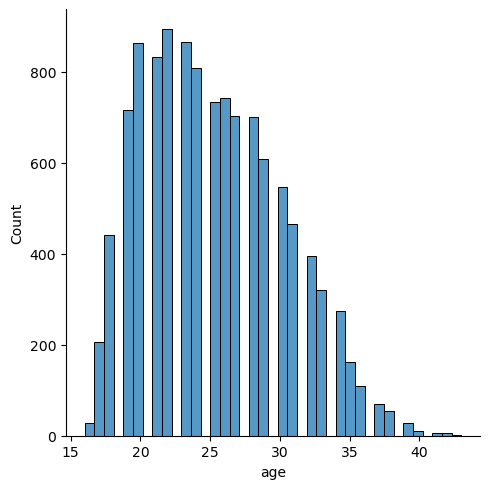

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


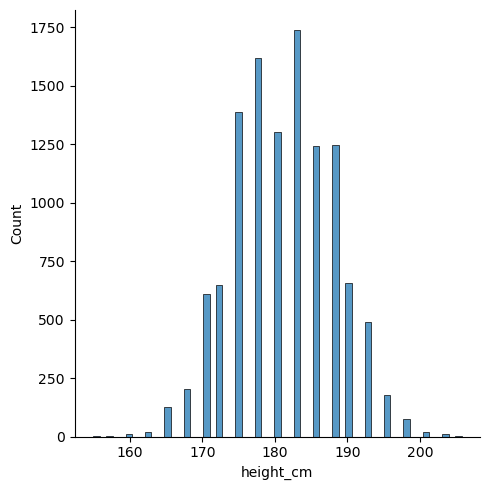

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


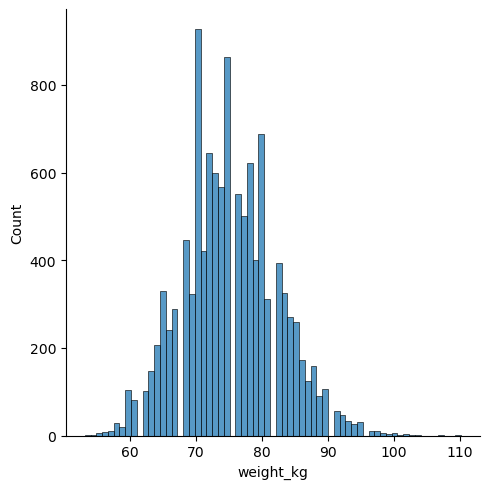

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


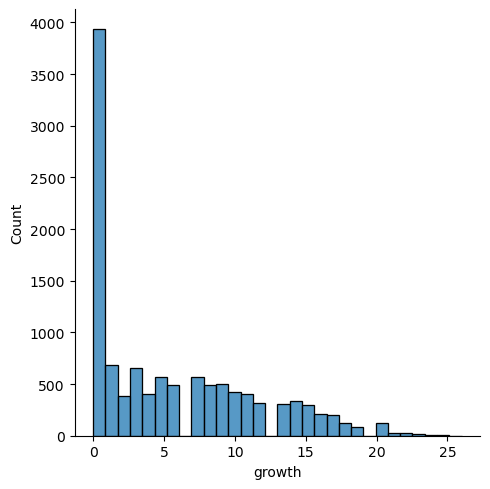

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


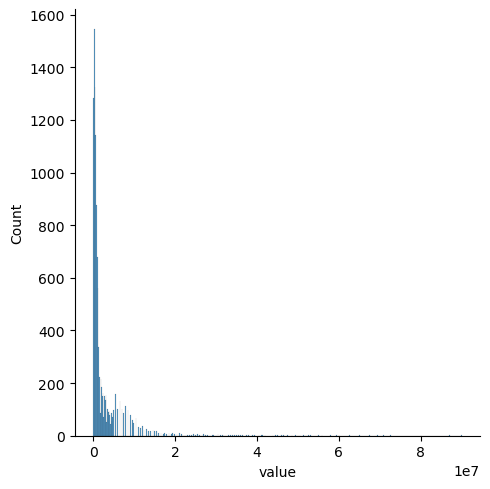

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


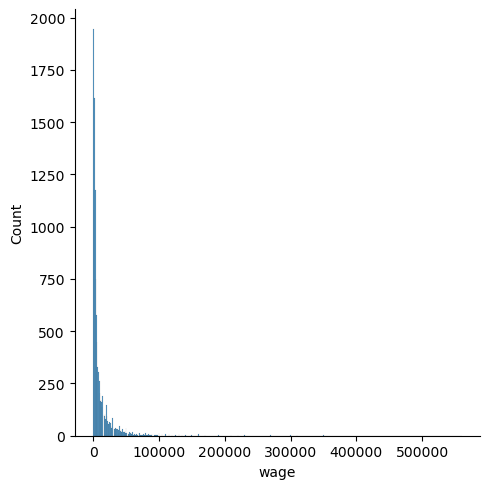

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


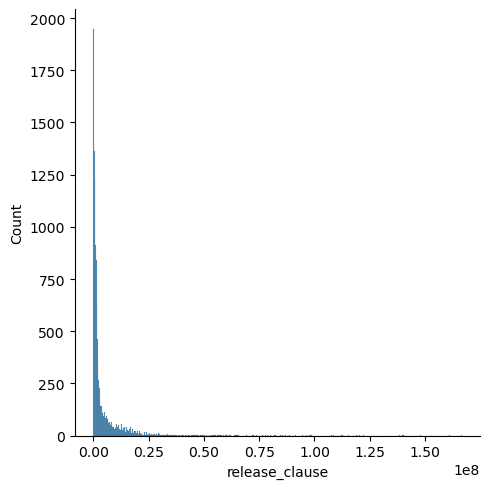

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


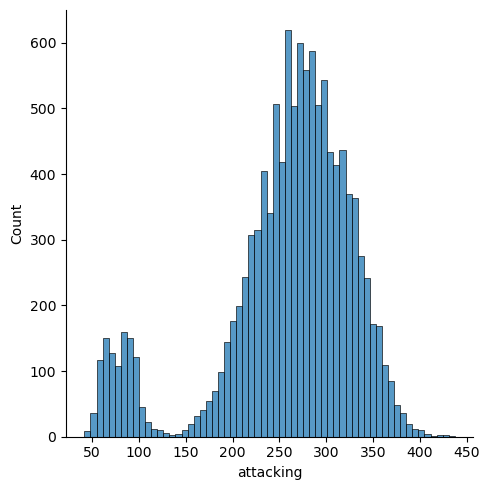

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


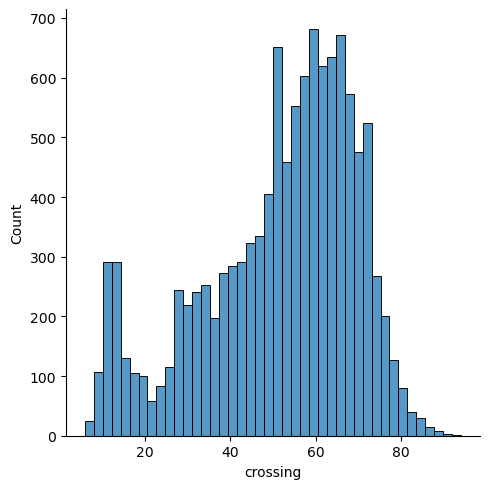

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


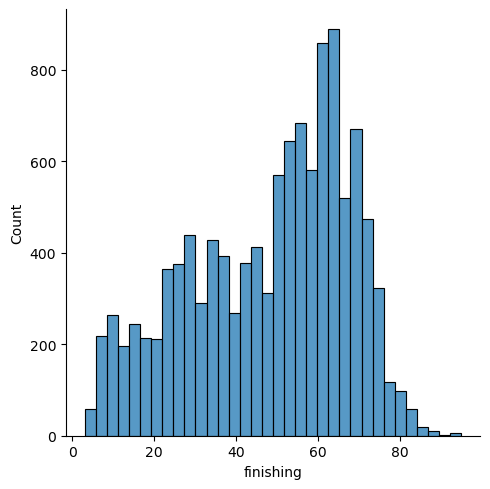

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


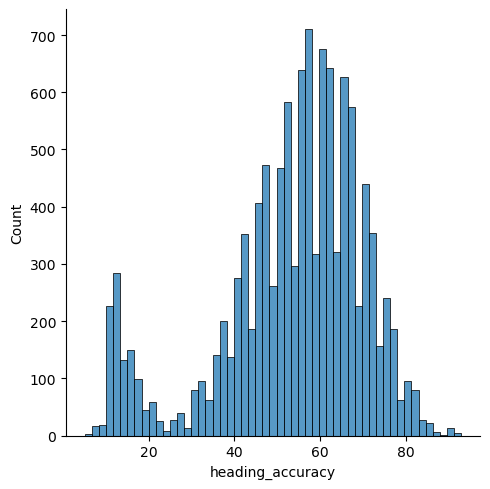

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


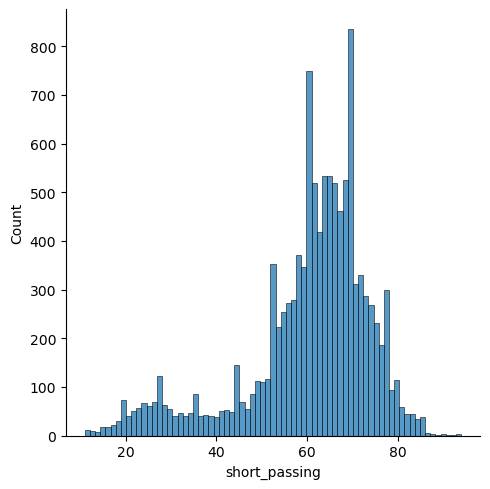

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


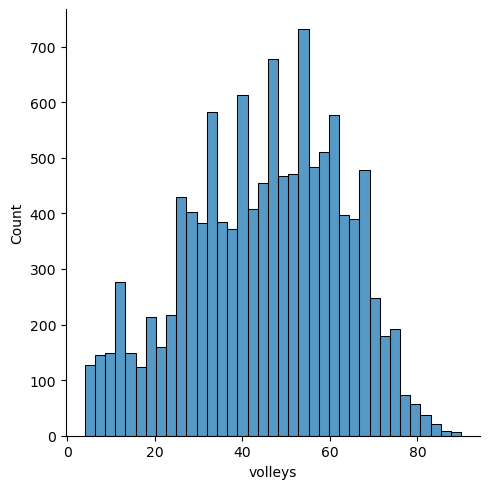

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


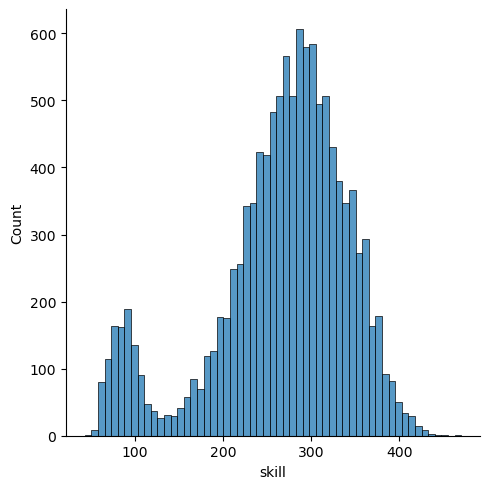

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


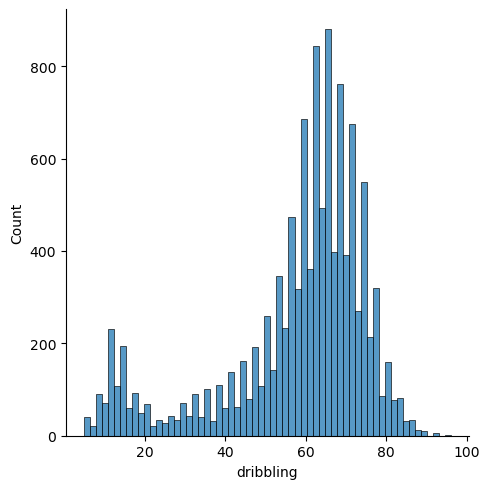

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


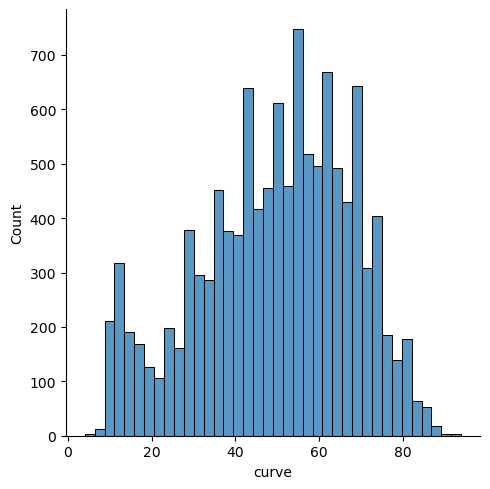

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


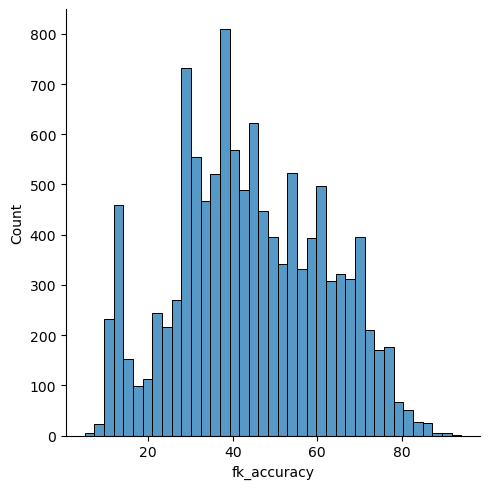

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


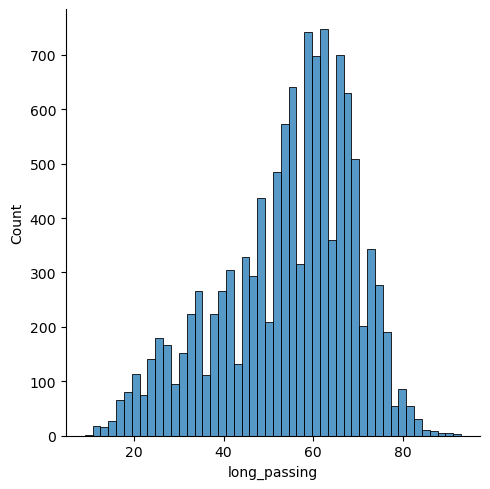

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


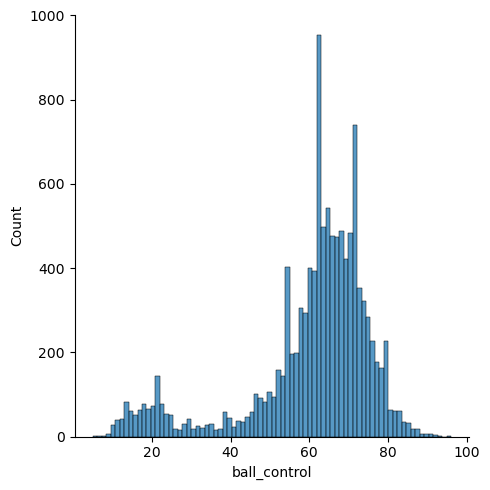

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


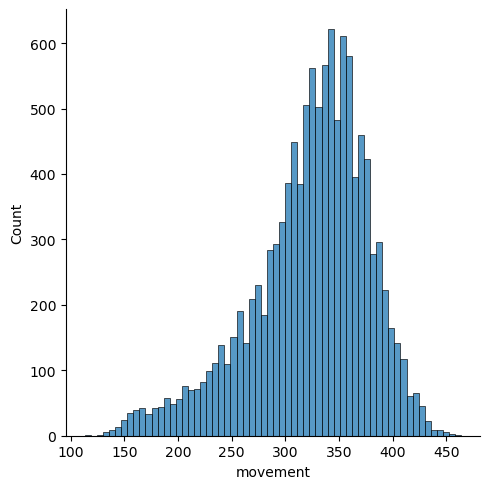

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


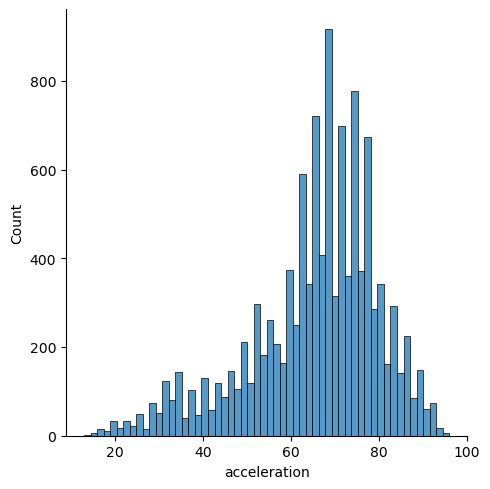

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


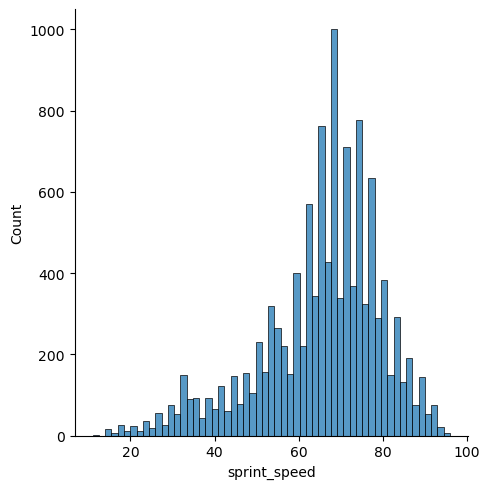

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


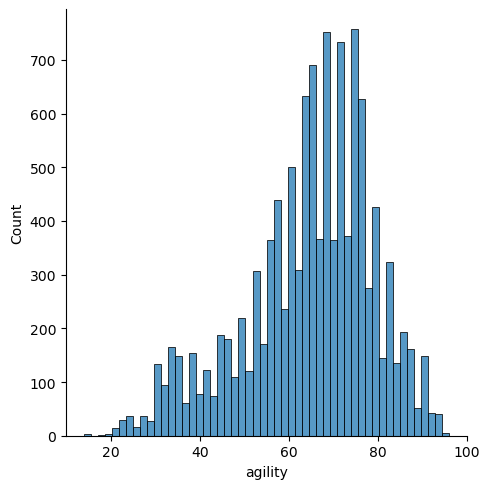

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


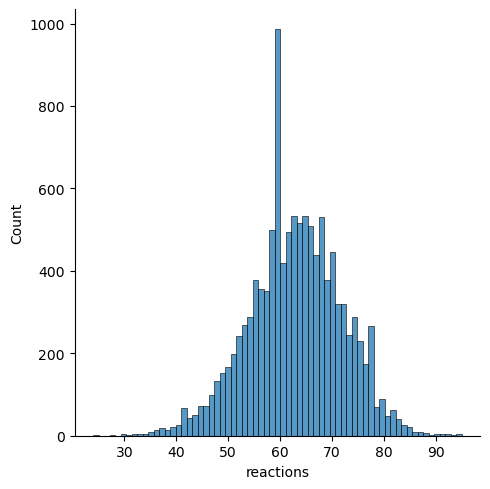

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


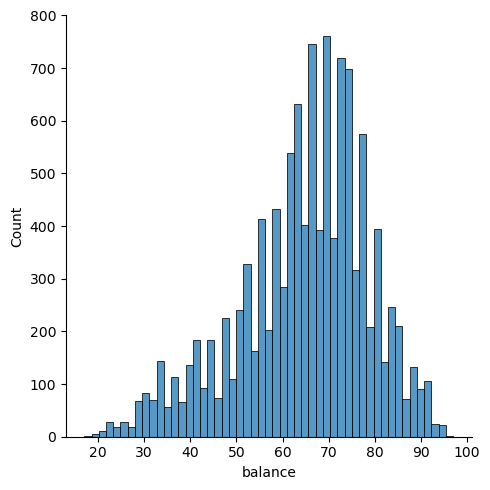

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


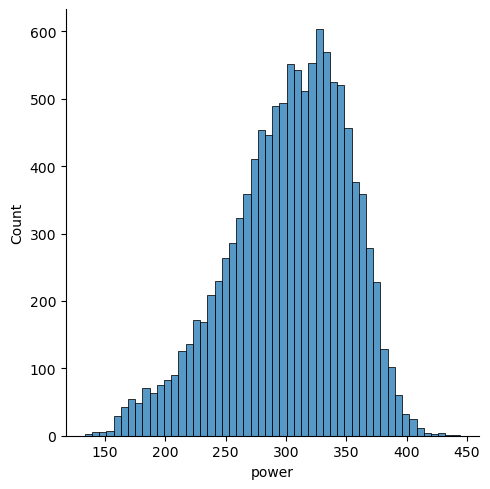

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


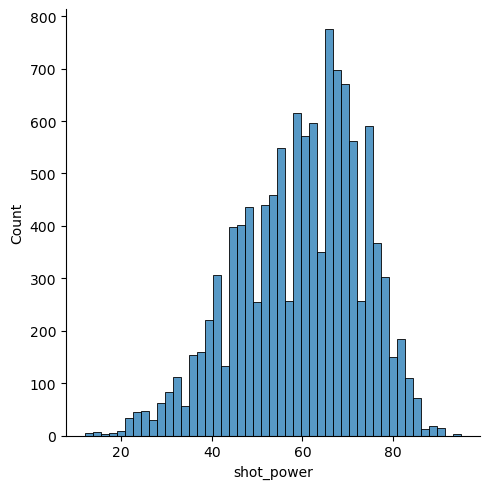

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


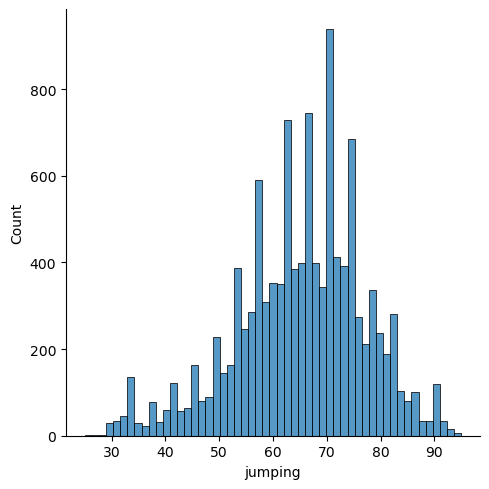

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


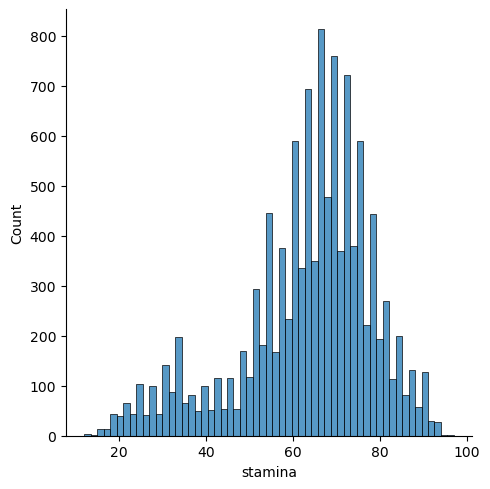

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


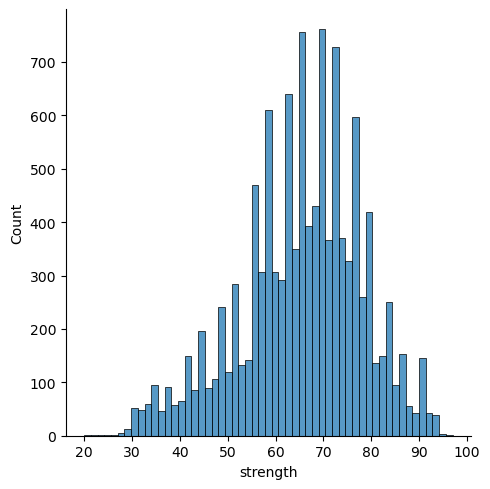

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


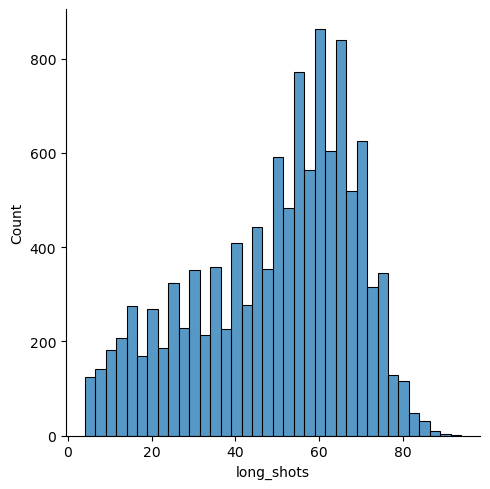

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


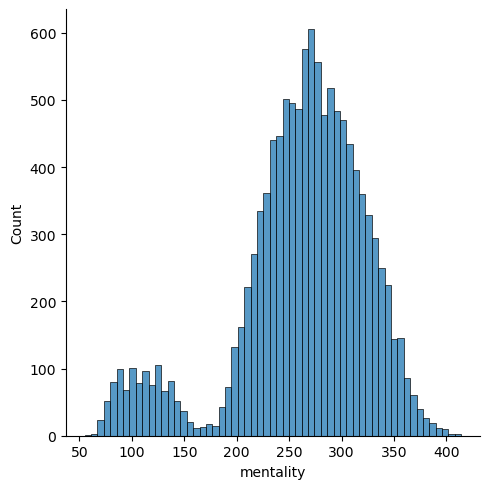

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


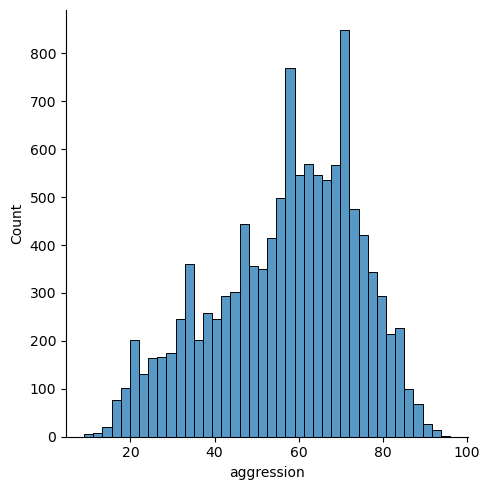

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


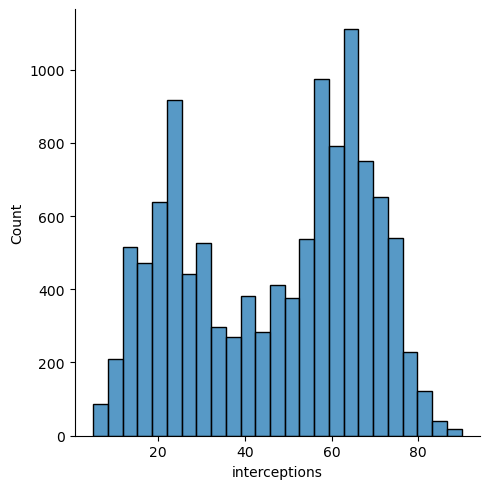

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


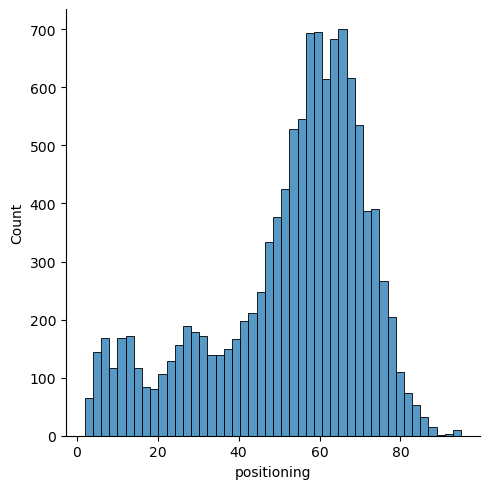

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


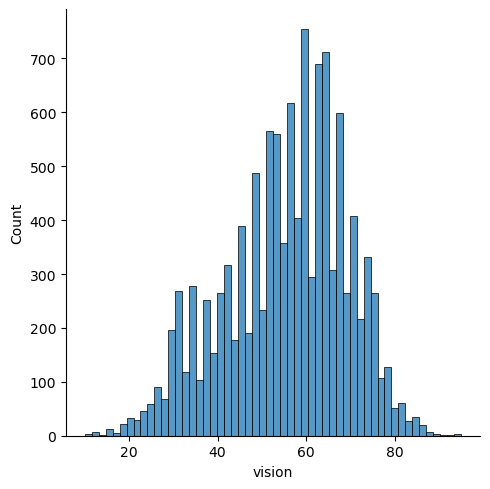

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


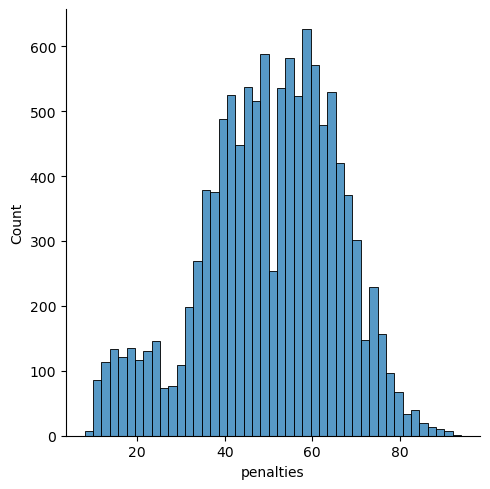

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


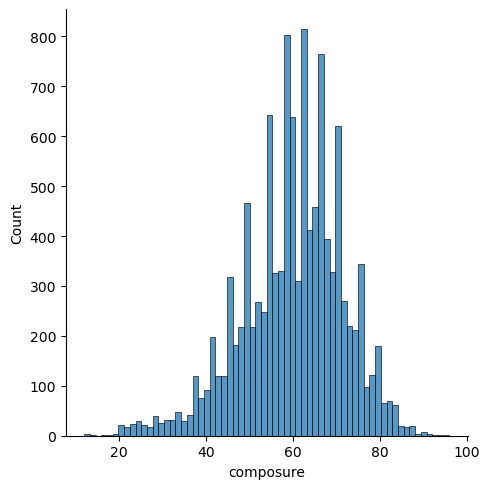

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


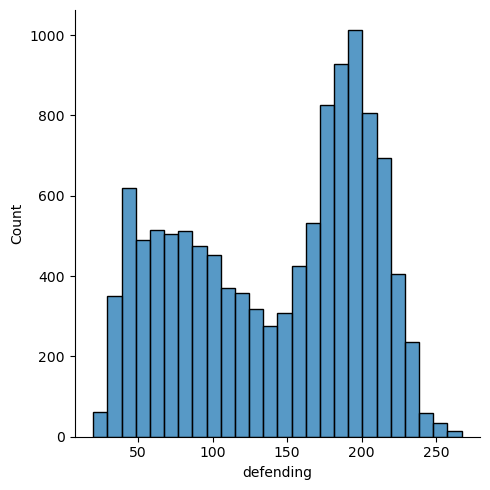

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


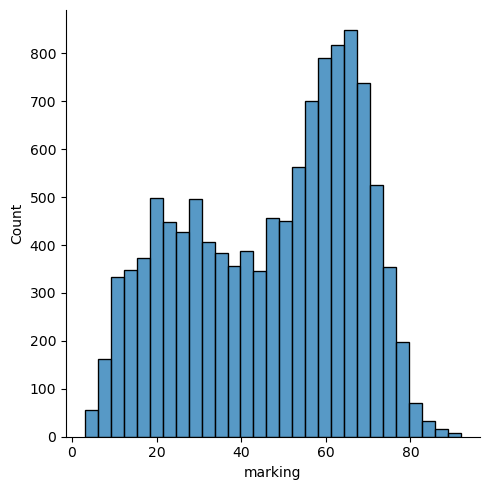

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


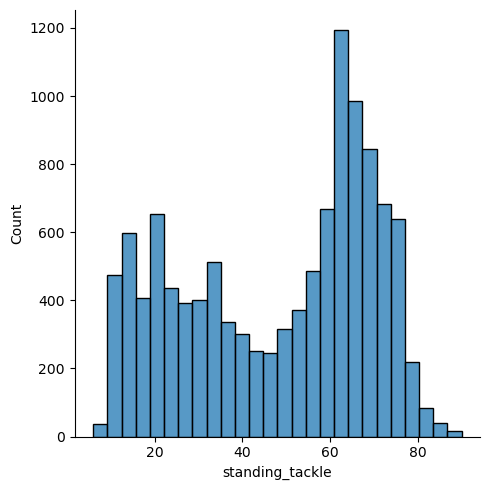

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


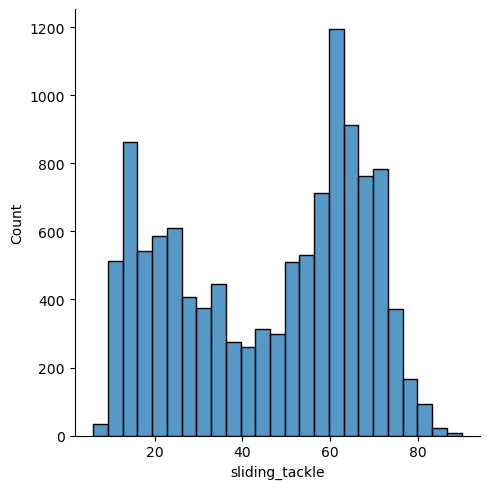

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


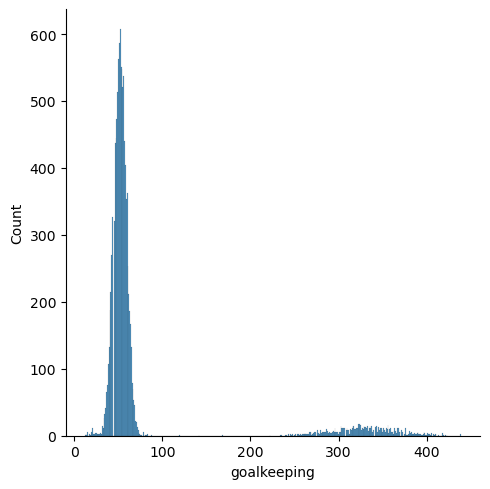

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


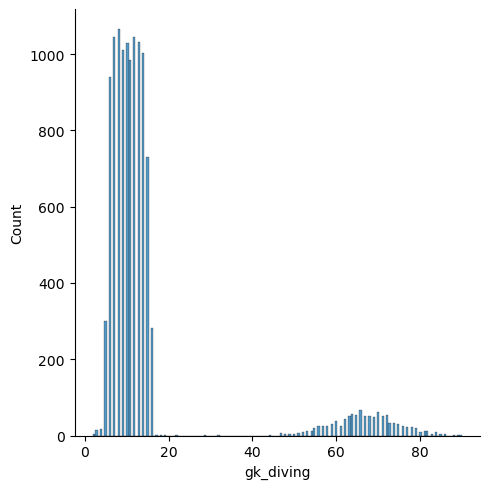

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


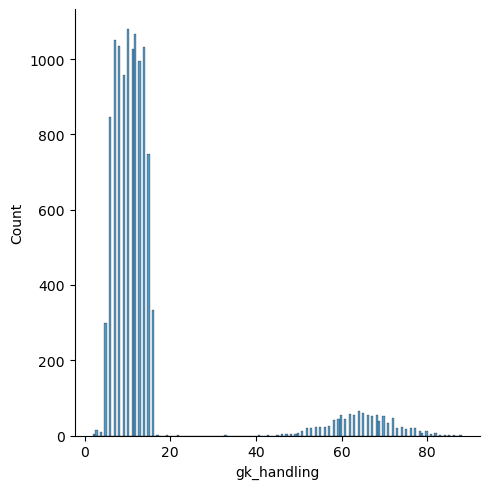

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


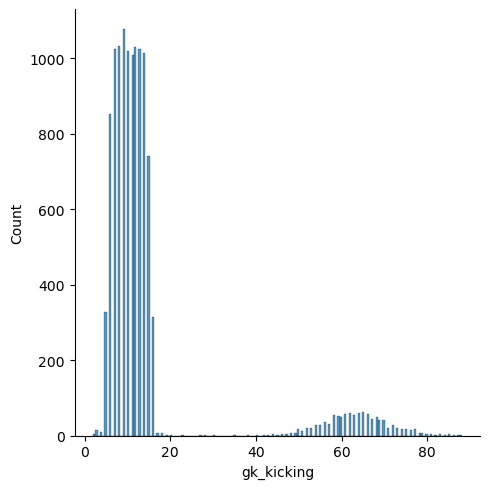

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


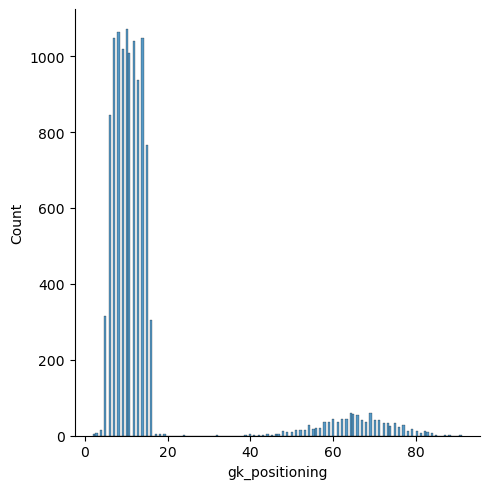

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


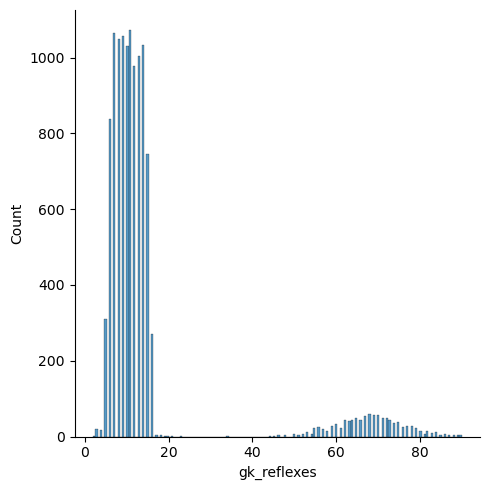

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


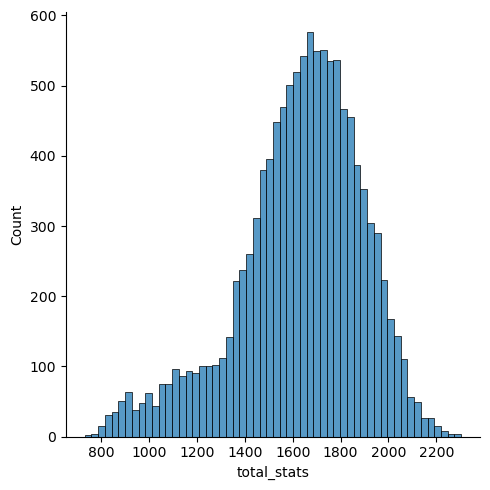

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


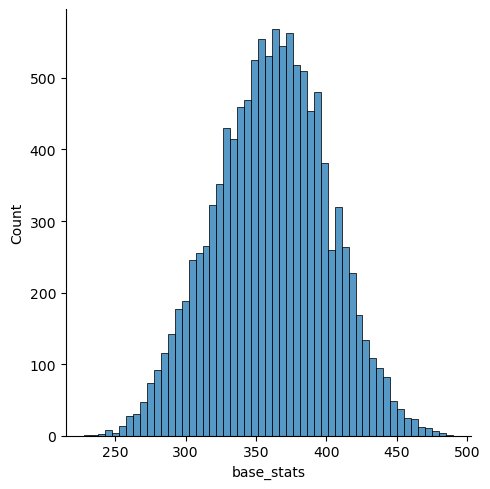

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


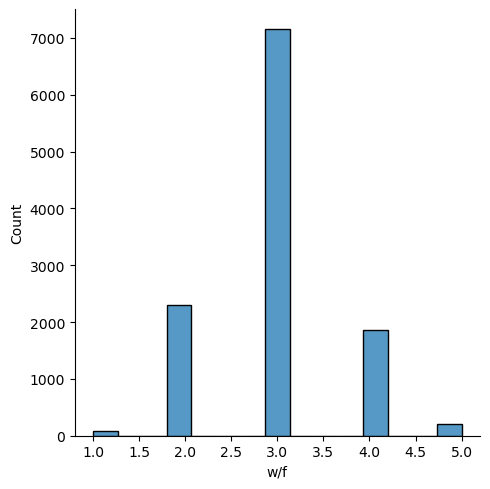

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


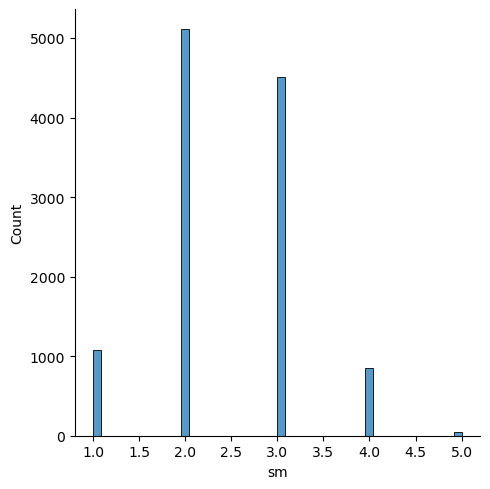

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


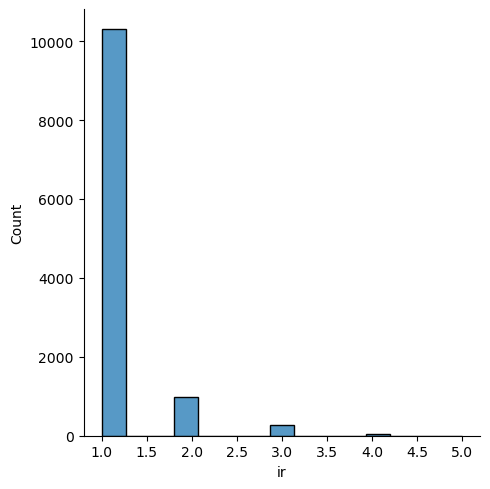

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


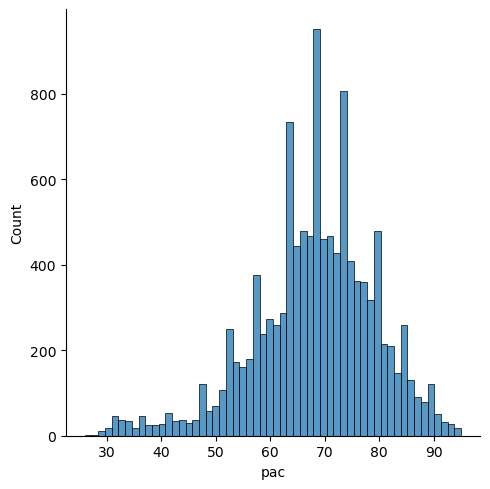

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


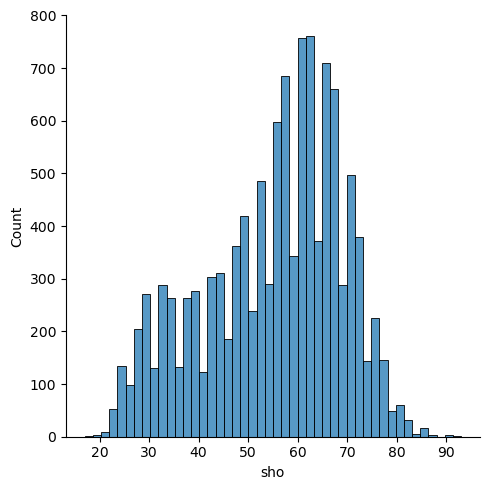

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


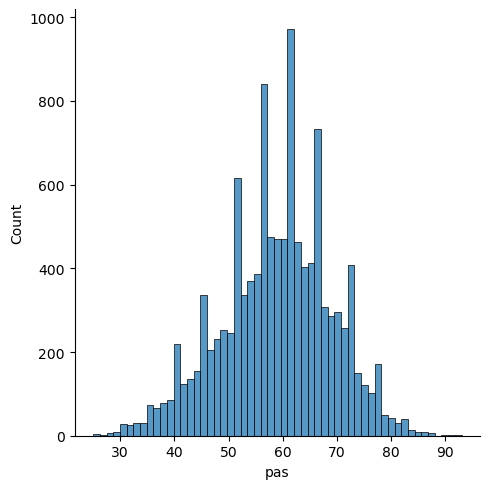

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


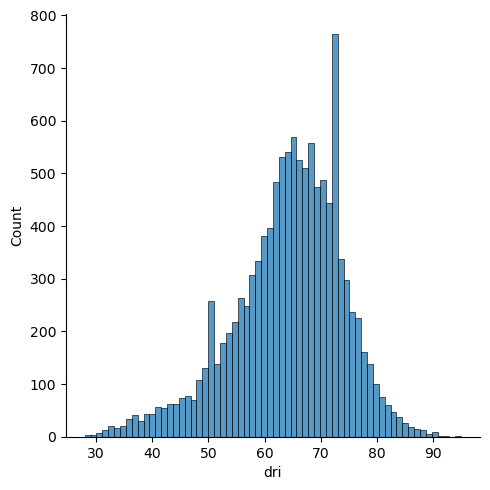

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


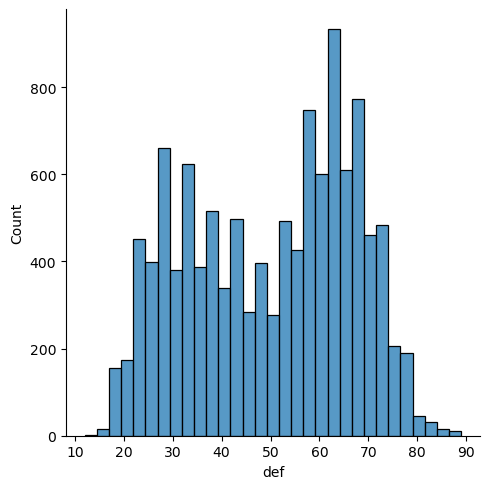

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


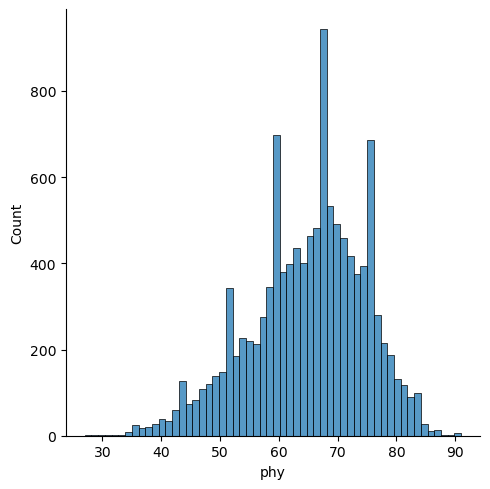

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


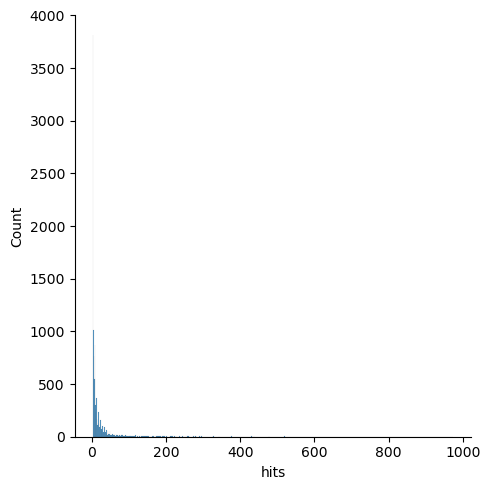

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


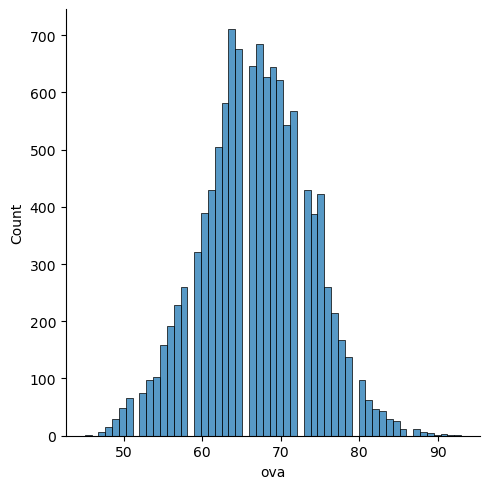

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


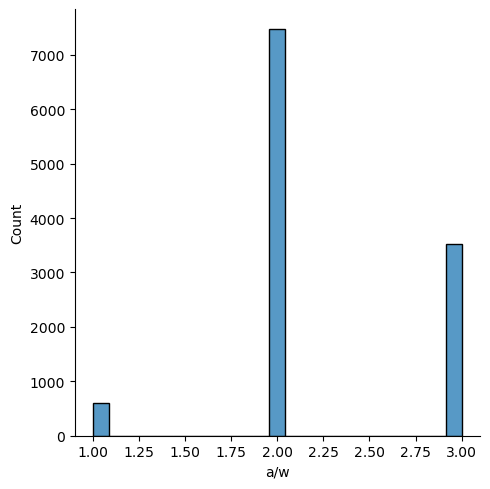

C:\Users\pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


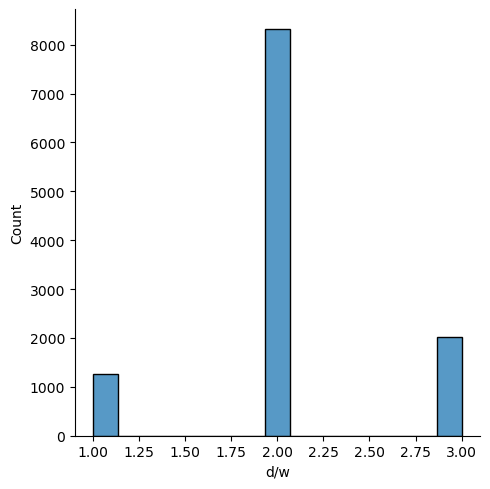

In [34]:
# Use seaborn library to construct distribution plots for the numerical variables

import matplotlib.pyplot as plt
import seaborn as sns

num_col_list = list(new_numerical_concatened.columns)
num_col_list

for i in num_col_list:
    sns.displot(new_numerical_concatened[i])
    plt.show()

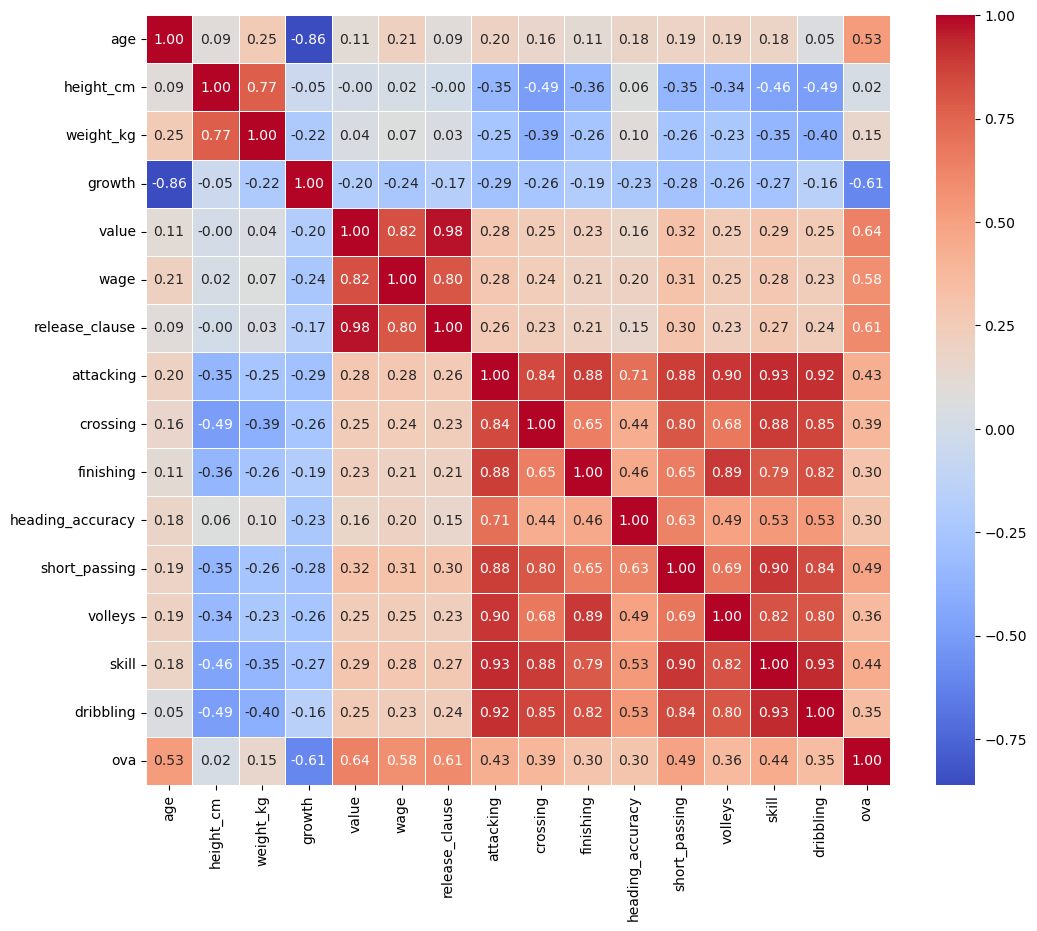

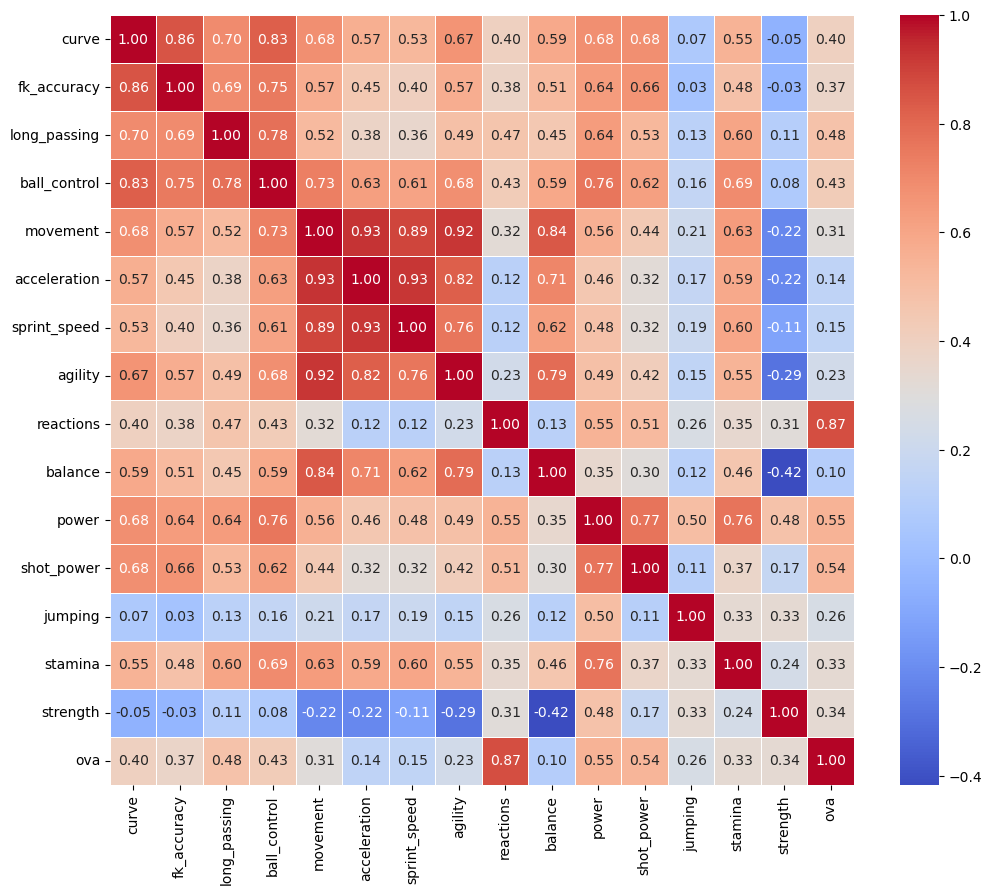

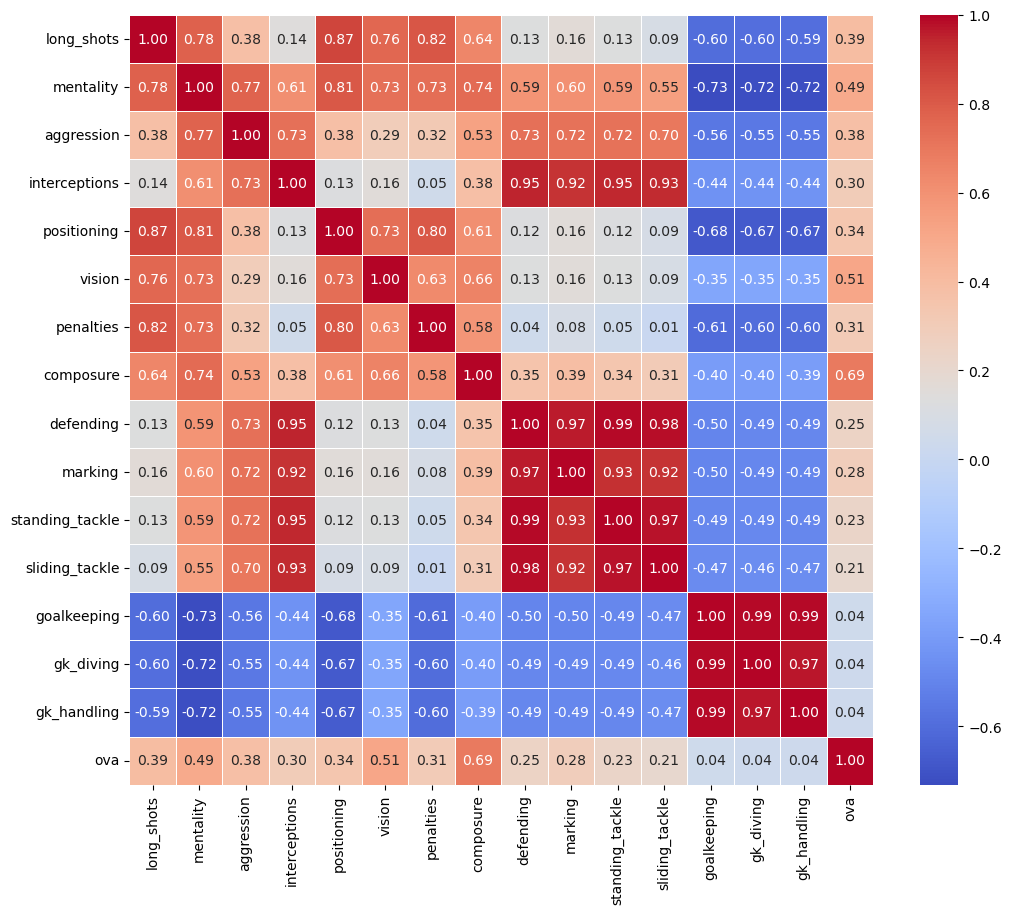

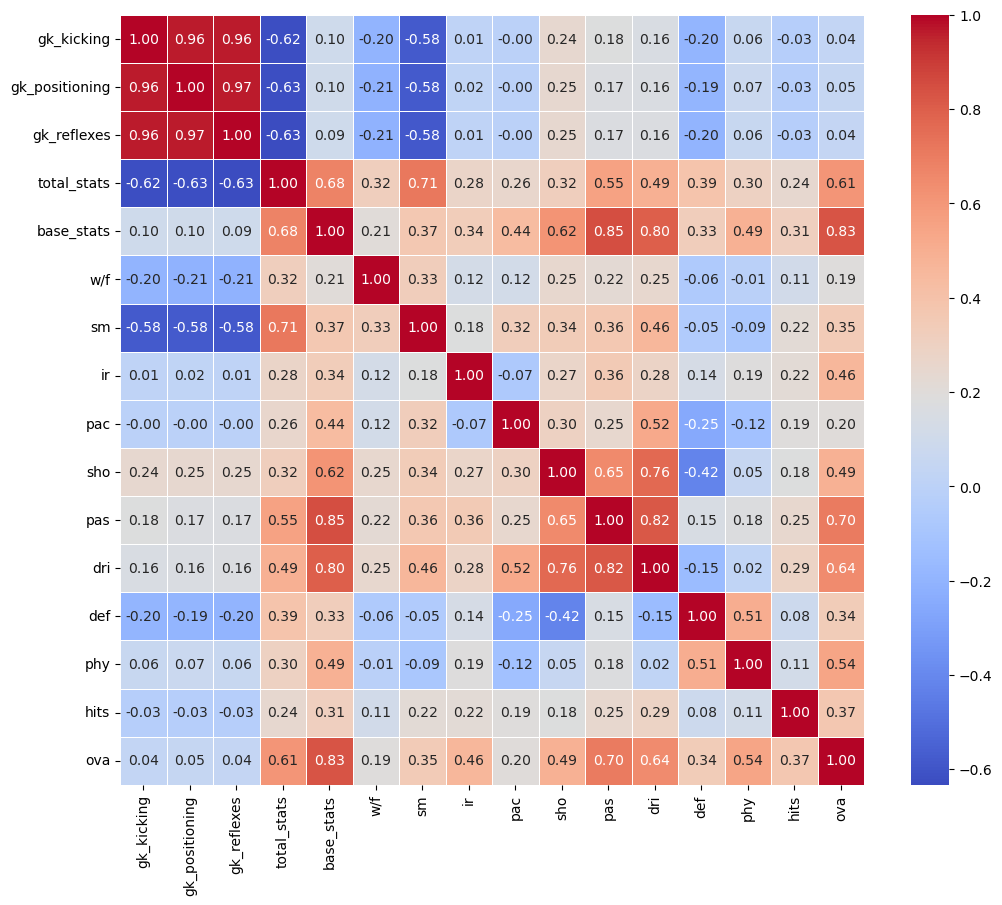

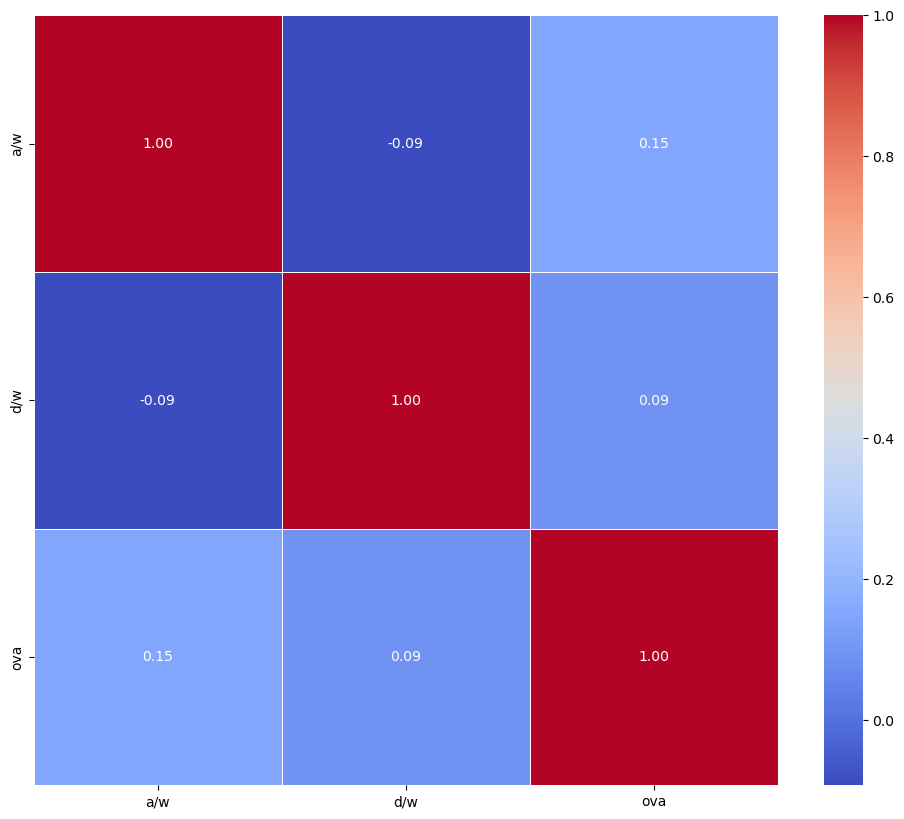

In [35]:
# For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

target_column = 'ova'
all_columns = new_numerical_concatened.columns.tolist()
all_columns.remove(target_column)

# Divide the remaining columns into four subsets
column_subsets = [all_columns[i:i+15] for i in range(0, len(all_columns), 15)]

# Create a heatmap for each subset with the target column
for subset in column_subsets:
    subset_with_target = subset + [target_column]
    correlation_matrix = new_numerical_concatened[subset_with_target].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
    plt.show()

In [36]:
# Now I will select the features I want to drop before training the model.
# I will first do a selection of those ones that have less than 0.3 correlation with 'ova'
# and select among those ones that are highly correlated between them


corr_features = new_numerical_concatened.drop(['height_cm', 'weight_kg', 'attacking', 'crossing', 'finishing', 'short_passing', 'volleys', 'dribbling', 'acceleration', 'sprint_speed', 'agility', 'balance', 'jumping', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'w/f', 'pac', 'a/w', 'd/w'], axis=1)
corr_features

age  growth      value     wage  release_clause  heading_accuracy  \
0       26       1   525000.0   4000.0        801000.0                43   
1       30       0  8500000.0  23000.0             0.0                76   
2       33       0  9000000.0  49000.0      15300000.0                34   
3       22      13   275000.0   4000.0        694000.0                58   
4       23       8   725000.0   2000.0       1400000.0                61   
...    ...     ...        ...      ...             ...               ...   
11695   29       0   550000.0    500.0       1200000.0                65   
11696   25       5   625000.0   3000.0        891000.0                51   
11697   27       4  1600000.0   4000.0       2900000.0                13   
11698   22       8  1100000.0   2000.0       1700000.0                51   
11700   22       9   700000.0   2000.0       1200000.0                65   

       skill  curve  fk_accuracy  long_passing  ball_control  movement  \
0        286   44.0           55            63            63       346   
1        375   78.0           72            63            79       404   
2        424   89.0           91            74            85       424   
3        259   41.0           46            57            61       282   
4        280   44.0           45            61            66       324   
...      ...    ...          ...           ...           ...       ...   
11695    283   56.0           56            46            63       368   
11696    248   49.0           29            54            59       333   
11697     96   15.0           19            27            18       237   
11698    291   57.0           38            58            67       388   
11700    267   41.0           43            55            64       391   

       reactions  power  shot_power  stamina  strength  long_shots  mentality  \
0             66    306          62       71        55          45        290   
1             75    372          74       75        74          68        313   
2             78    308          79       75        42          78        332   
3             55    277          57       64        58          38        257   
4             62    280          61       81        61          43        294   
...          ...    ...         ...      ...       ...         ...        ...   
11695         71    303          64       56        60          65        254   
11696         53    273          31       77        68          25        266   
11697         65    217          50       29        64          15        101   
11698         62    278          61       64        37          45        241   
11700         61    312          62       65        42          58        244   

       aggression  interceptions  positioning  vision  penalties  composure  \
0              54           52.0         62.0    68.0         54       54.0   
1              54           33.0         78.0    72.0         76       70.0   
2              75           26.0         80.0    78.0         73       82.0   
3              61           57.0         31.0    54.0         54       48.0   
4              66           60.0         55.0    64.0         49       58.0   
...           ...            ...          ...     ...        ...        ...   
11695          50           33.0         64.0    37.0         70       60.0   
11696          63           59.0         51.0    54.0         39       46.0   
11697          30           22.0         15.0    15.0         19       56.0   
11698          27           25.0         66.0    58.0         65       58.0   
11700          34           20.0         66.0    63.0         61       56.0   

       defending  marking  total_stats  base_stats  sm  ir  sho  pas  dri  \
0            148       49         1682         357   2   1   51   63   63   
1             77       35         1961         412   4   2   75   68   82   
2             80       23         1925         404  

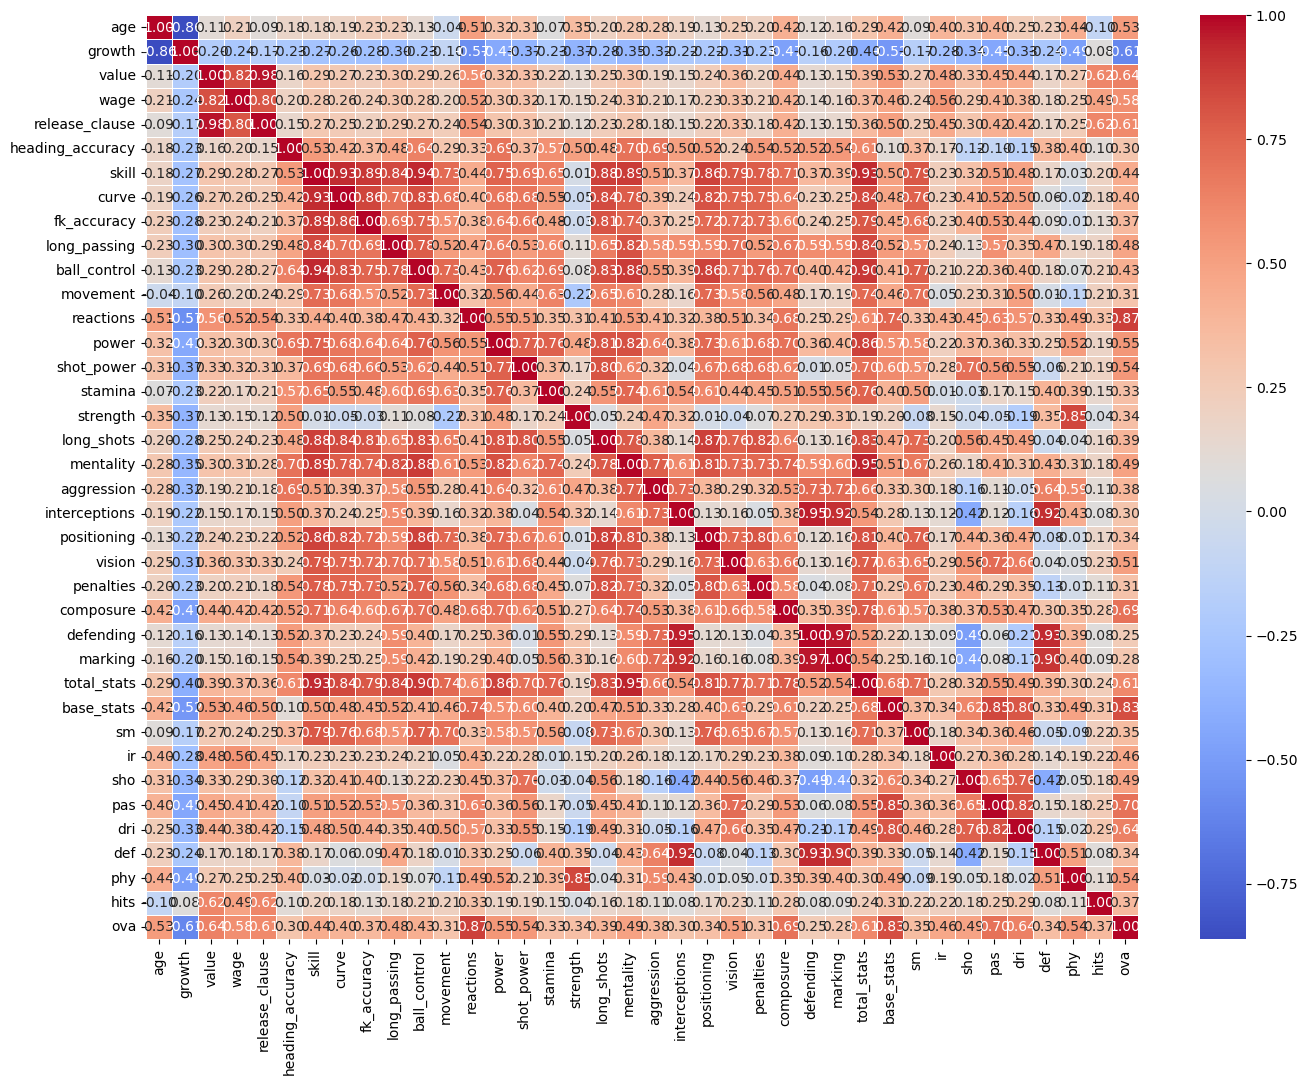

In [37]:
# Lets try now to do a heatmap with all the features remaining

correlations_matrix = corr_features.corr()

# Increase figure size
plt.figure(figsize=(16, 12))

# Use a diverging color map
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create a clustered heatmap
sns.heatmap(correlations_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

In [38]:
# I still have a lot of features with low correlation with 'ova' so I drop more of them

corr_features_2 = corr_features.drop(['heading_accuracy', 'fk_accuracy', 'movement', 'stamina', 'strength', 'interceptions', 'positioning', 'penalties', 'defending', 'marking', 'sm', 'def', 'hits'], axis=1)
corr_features_2

age  growth      value     wage  release_clause  skill  curve  \
0       26       1   525000.0   4000.0        801000.0    286   44.0   
1       30       0  8500000.0  23000.0             0.0    375   78.0   
2       33       0  9000000.0  49000.0      15300000.0    424   89.0   
3       22      13   275000.0   4000.0        694000.0    259   41.0   
4       23       8   725000.0   2000.0       1400000.0    280   44.0   
...    ...     ...        ...      ...             ...    ...    ...   
11695   29       0   550000.0    500.0       1200000.0    283   56.0   
11696   25       5   625000.0   3000.0        891000.0    248   49.0   
11697   27       4  1600000.0   4000.0       2900000.0     96   15.0   
11698   22       8  1100000.0   2000.0       1700000.0    291   57.0   
11700   22       9   700000.0   2000.0       1200000.0    267   41.0   

       long_passing  ball_control  reactions  power  shot_power  long_shots  \
0                63            63         66    306          62          45   
1                63            79         75    372          74          68   
2                74            85         78    308          79          78   
3                57            61         55    277          57          38   
4                61            66         62    280          61          43   
...             ...           ...        ...    ...         ...         ...   
11695            46            63         71    303          64          65   
11696            54            59         53    273          31          25   
11697            27            18         65    217          50          15   
11698            58            67         62    278          61          45   
11700            55            64         61    312          62          58   

       mentality  aggression  vision  composure  total_stats  base_stats  ir  \
0            290          54    68.0       54.0         1682         357   1   
1            313          54    72.0       70.0         1961         412   2   
2            332          75    78.0       82.0         1925         404   2   
3            257          61    54.0       48.0         1527         329   1   
4            294          66    64.0       58.0         1664         360   1   
...          ...         ...     ...        ...          ...         ...  ..   
11695        254          50    37.0       60.0         1638         337   1   
11696        266          63    54.0       46.0         1589         347   1   
11697        101          30    15.0       56.0         1123         387   1   
11698        241          27    58.0       58.0         1603         337   1   
11700        244          34    63.0       56.0         1607         336   1   

       sho  pas  dri  phy  ova  
0       51   63   63   60   64  
1       75   68   82   71   77  
2       77   78   86   56   80  
3       44   54   57   60   59  
4       44   60   64   66   65  
...    ...  ...  ...  ...  ...  
11695   68   47   66   57   65  
11696   28   56   59   69   65  
11697   67   66   72   70   70  
11698   60   60   72   43   67  
11700   62   56   67   48   64  

[11586 rows x 25 columns]

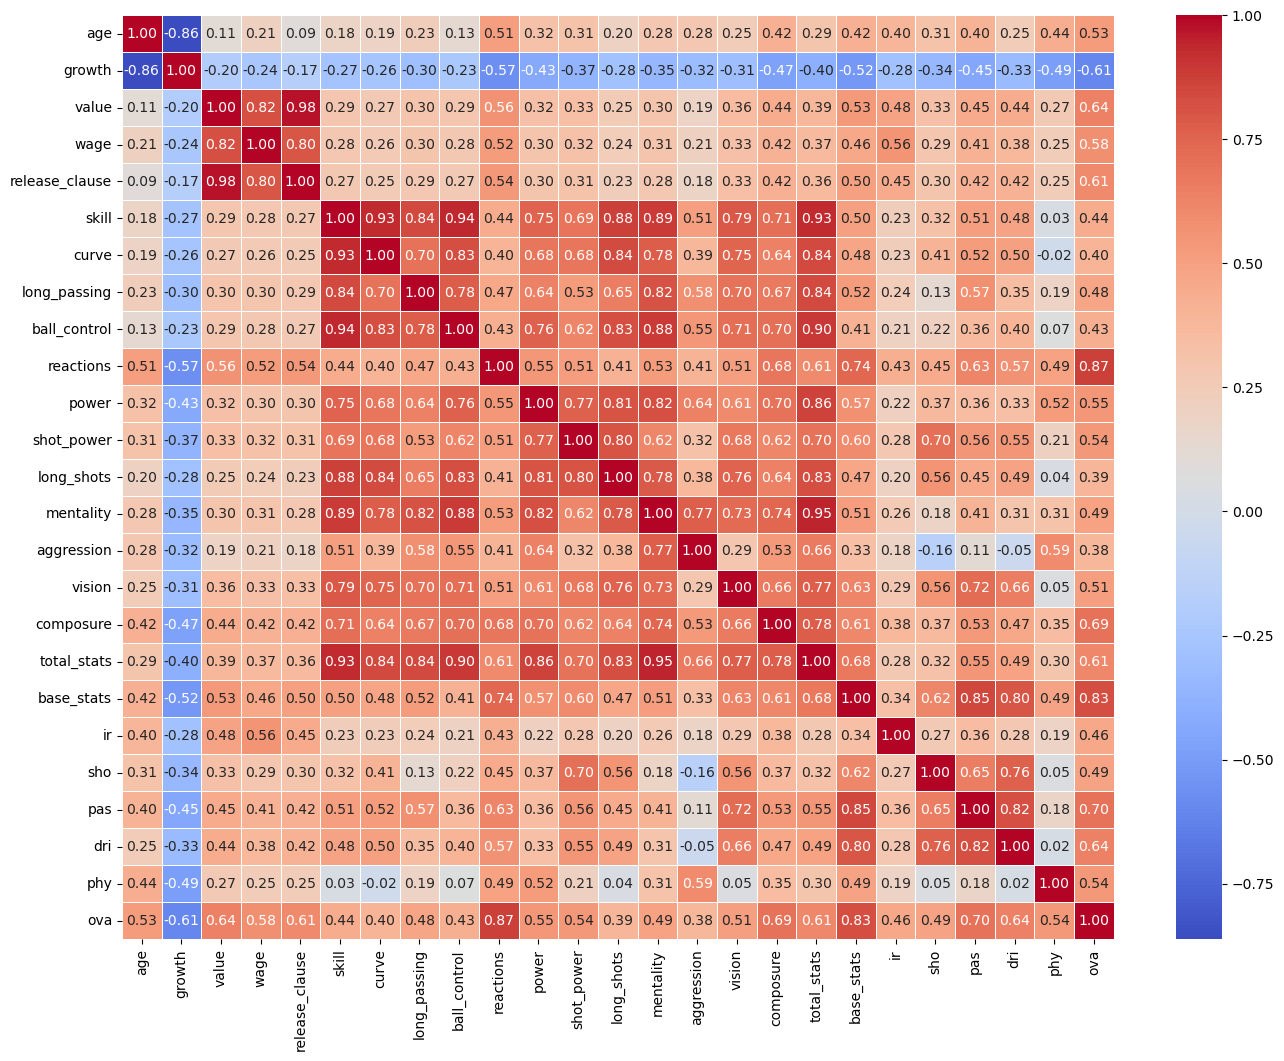

In [39]:
# Lets try now to do a heatmap with all the features remaining

correlations_matrix = corr_features_2.corr()

# Increase figure size
plt.figure(figsize=(16, 12))

# Use a diverging color map
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create a clustered heatmap
sns.heatmap(correlations_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

In [40]:
# Perfect, now the feature with least correlation with 'ova' has almost 0.4 of correlation
# now lets concentrate on those features that are highly correlated between them

corr_features_3 = corr_features_2.drop(['pas', 'skill', 'curve', 'long_passing', 'ball_control', 'power', 'mentality', 'long_shots', 'wage', 'release_clause'], axis=1)
corr_features_3

age  growth      value  reactions  shot_power  aggression  vision  \
0       26       1   525000.0         66          62          54    68.0   
1       30       0  8500000.0         75          74          54    72.0   
2       33       0  9000000.0         78          79          75    78.0   
3       22      13   275000.0         55          57          61    54.0   
4       23       8   725000.0         62          61          66    64.0   
...    ...     ...        ...        ...         ...         ...     ...   
11695   29       0   550000.0         71          64          50    37.0   
11696   25       5   625000.0         53          31          63    54.0   
11697   27       4  1600000.0         65          50          30    15.0   
11698   22       8  1100000.0         62          61          27    58.0   
11700   22       9   700000.0         61          62          34    63.0   

       composure  total_stats  base_stats  ir  sho  dri  phy  ova  
0           54.0         1682         357   1   51   63   60   64  
1           70.0         1961         412   2   75   82   71   77  
2           82.0         1925         404   2   77   86   56   80  
3           48.0         1527         329   1   44   57   60   59  
4           58.0         1664         360   1   44   64   66   65  
...          ...          ...         ...  ..  ...  ...  ...  ...  
11695       60.0         1638         337   1   68   66   57   65  
11696       46.0         1589         347   1   28   59   69   65  
11697       56.0         1123         387   1   67   72   70   70  
11698       58.0         1603         337   1   60   72   43   67  
11700       56.0         1607         336   1   62   67   48   64  

[11586 rows x 15 columns]

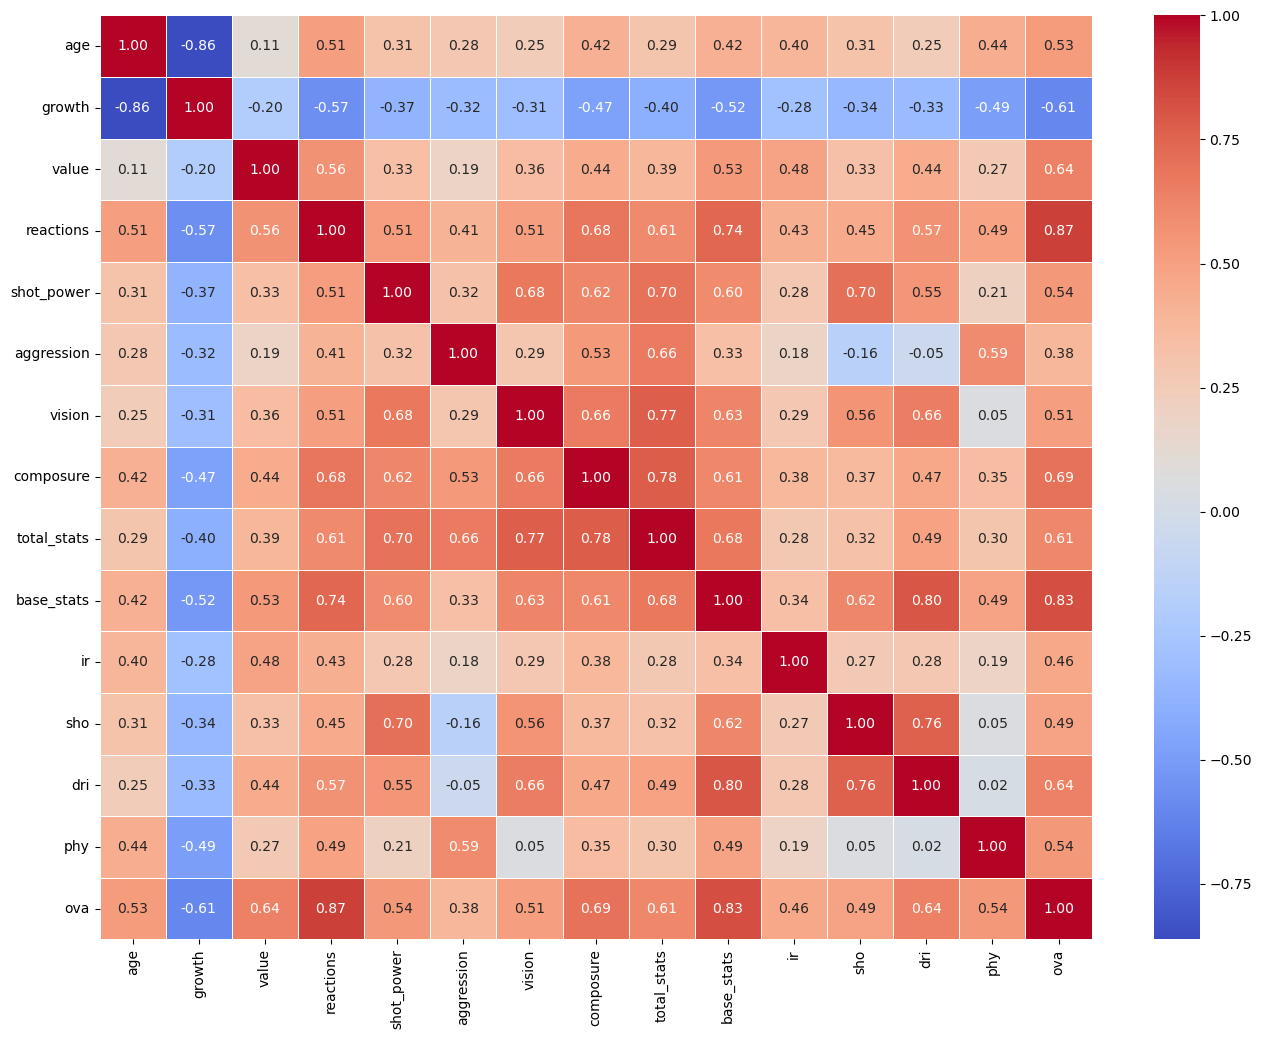

In [41]:
# Lets try now to do a heatmap with all the features remaining

correlations_matrix = corr_features_3.corr()

# Increase figure size
plt.figure(figsize=(16, 12))

# Use a diverging color map
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create a clustered heatmap
sns.heatmap(correlations_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

In [42]:
corr_features_3.shape

(11586, 15)

In [43]:
# I import the libraries I need

from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler
import math
from sklearn import linear_model

In [44]:
# X-y split

y = corr_features_3['ova']
X = corr_features_3.drop(['ova'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object) 
display(X_num)
X_cat

age  growth      value  reactions  shot_power  aggression  vision  \
0       26       1   525000.0         66          62          54    68.0   
1       30       0  8500000.0         75          74          54    72.0   
2       33       0  9000000.0         78          79          75    78.0   
3       22      13   275000.0         55          57          61    54.0   
4       23       8   725000.0         62          61          66    64.0   
...    ...     ...        ...        ...         ...         ...     ...   
11695   29       0   550000.0         71          64          50    37.0   
11696   25       5   625000.0         53          31          63    54.0   
11697   27       4  1600000.0         65          50          30    15.0   
11698   22       8  1100000.0         62          61          27    58.0   
11700   22       9   700000.0         61          62          34    63.0   

       composure  total_stats  base_stats  ir  sho  dri  phy  
0           54.0         1682         357   1   51   63   60  
1           70.0         1961         412   2   75   82   71  
2           82.0         1925         404   2   77   86   56  
3           48.0         1527         329   1   44   57   60  
4           58.0         1664         360   1   44   64   66  
...          ...          ...         ...  ..  ...  ...  ...  
11695       60.0         1638         337   1   68   66   57  
11696       46.0         1589         347   1   28   59   69  
11697       56.0         1123         387   1   67   72   70  
11698       58.0         1603         337   1   60   72   43  
11700       56.0         1607         336   1   62   67   48  

[11586 rows x 14 columns]

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, ...]

[11586 rows x 0 columns]

In [45]:
# Scaling
# I will do it with Normalizing

# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X_num) #.fit takes only min and max
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
normalized_num = pd.DataFrame(x_normalized, columns=X_num.columns)
normalized_num

(11586, 14)


age    growth     value  reactions  shot_power  aggression  \
0      0.370370  0.038462  0.005833   0.591549    0.602410    0.517241   
1      0.518519  0.000000  0.094444   0.718310    0.746988    0.517241   
2      0.629630  0.000000  0.100000   0.760563    0.807229    0.758621   
3      0.222222  0.500000  0.003056   0.436620    0.542169    0.597701   
4      0.259259  0.307692  0.008056   0.535211    0.590361    0.655172   
...         ...       ...       ...        ...         ...         ...   
11581  0.481481  0.000000  0.006111   0.661972    0.626506    0.471264   
11582  0.333333  0.192308  0.006944   0.408451    0.228916    0.620690   
11583  0.407407  0.153846  0.017778   0.577465    0.457831    0.241379   
11584  0.222222  0.307692  0.012222   0.535211    0.590361    0.206897   
11585  0.222222  0.346154  0.007778   0.521127    0.602410    0.287356   

         vision  composure  total_stats  base_stats    ir       sho       dri  \
0      0.682353   0.500000     0.604577    0.492366  0.00  0.447368  0.522388   
1      0.729412   0.690476     0.781945    0.702290  0.25  0.763158  0.805970   
2      0.800000   0.833333     0.759059    0.671756  0.25  0.789474  0.865672   
3      0.517647   0.428571     0.506039    0.385496  0.00  0.355263  0.432836   
4      0.635294   0.547619     0.593134    0.503817  0.00  0.355263  0.537313   
...         ...        ...          ...         ...   ...       ...       ...   
11581  0.317647   0.571429     0.576605    0.416031  0.00  0.671053  0.567164   
11582  0.517647   0.404762     0.545455    0.454198  0.00  0.144737  0.462687   
11583  0.058824   0.523810     0.249205    0.606870  0.00  0.657895  0.656716   
11584  0.564706   0.547619     0.554355    0.416031  0.00  0.565789  0.656716   
11585  0.623529   0.523810     0.556898    0.412214  0.00  0.592105  0.582090   

            phy  
0      0.515625  
1      0.687500  
2      0.453125  
3      0.515625  
4      0.609375  
...         ...  
11581  0.468750  
11582  0.656250  
11583  0.671875  
11584  0.250000  
11585  0.328125  

[11586 rows x 14 columns]

In [46]:
# Train-test split

# The y is already defined
# Defining our X
X = normalized_num

In [47]:
# train test split is the way ML generates its claim to fame: 
# we build the model on a portion of the data but we then validate it in another "fresh" portion.
# Our model has no opportunity to "cheat": it must accurately guess the values 
# in the "fresh" dataset that it never saw before
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8689, 14)
(2897, 14)
(8689,)
(2897,)


In [49]:
y_train.head()

# it has the same indexes as the X_train so it's done perfectly

2110     73
1432     71
10930    74
3835     63
895      57
Name: ova, dtype: int64

In [50]:
# We train/fit our model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [51]:

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.8830026999047865

In [52]:
# But now we evaluate it in the TEST portion of the data, that we did not use for training.
# This way we know our model is genuinely guessing our donations, not just repeating the values it has seen in the training data
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.8899827234784028

In [53]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

5.199581327478774

In [54]:
# Root mean squared error
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

# This is the margin of error we should use as it is in the right format as the original variable total_claim_amount

2.280259048327355

In [55]:
# Mean absolute error
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

1.759485323441656


### Now I have a new dataset with which validate the model

I want to do the same cleaning steps that I performed in my first dataset so I will make functions for that. I work with the advantage that I already know the columns that I need so I will select those the first thing.

In [56]:
# I read the fifa validation dataset
validation_fifa = pd.read_csv('fifa21_validate.csv')
validation_fifa.head()

ID             Name  Age    Nationality                 Club   BP  \
0  219461  E. Palmer-Brown   23  United States      FK Austria Wien   CB   
1  221896       D. Avdijaj   22         Kosovo  Heart of Midlothian  CAM   
2  247428         D. Ochoa   19  United States       Real Salt Lake   GK   
3  255120        N. Kenneh   16        England         Leeds United  CDM   
4  215556     E. Fernandes   24    Switzerland      1. FSV Mainz 05  CDM   

    Position                       Team & Contract Height  Weight   foot  \
0         CB  FK Austria Wien Jun 30, 2021 On Loan   6'2"  194lbs  Right   
1     LM CAM       Heart of Midlothian 2020 ~ 2020   5'8"  154lbs  Right   
2         GK            Real Salt Lake 2018 ~ 2020   6'2"  176lbs  Right   
3  CB CDM RB              Leeds United 2020 ~ 2022   6'3"  170lbs  Right   
4     CM CDM           1. FSV Mainz 05 2019 ~ 2023   6'2"  170lbs  Right   

   Growth        Joined Loan Date End  Value  Wage Release Clause  \
0       7   Feb 8, 2018  Jun 30, 2021  €975K   €5K             €0   
1       5  Jan 20, 2020           NaN  €1.2M   €3K          €2.2M   
2      17  Nov 28, 2018           NaN  €120K  €500          €249K   
3      23  Jan 10, 2020           NaN  €160K  €500          €464K   
4       5   Jul 1, 2019           NaN  €2.3M  €13K          €4.3M   

               Contract  Attacking  Crossing  Finishing  Heading Accuracy  \
0  Jun 30, 2021 On Loan        230        47         21                62   
1           2020 ~ 2020        298        62         60                44   
2           2018 ~ 2020         48         7          5                11   
3           2020 ~ 2022        215        38         31                55   
4           2019 ~ 2023        295        57         59                45   

   Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  Long Passing  \
0             60     40.0    228         44   43.0           36            51   
1             62     70.0    330         76   68.0           56            60   
2             21      4.0     52          6    8.0            8            20   
3             59     32.0    224         51   34.0           38            47   
4             78     56.0    327         71   57.0           51            74   

   Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions  \
0            54       303            60            68     63.0         63   
1            70       375            77            72     83.0         64   
2            10       165            28            25     33.0         41   
3            54       275            59            58     56.0         48   
4            74       320            68            66     66.0         64   

   Balance  Power  Shot Power  Jumping  Stamina  Strength  Long Shots  \
0     49.0    288          48     77.0       51        87          25   
1     79.0    323          76     62.0       63        47          75   
2     38.0    171          40     49.0       22        54           6   
3     54.0    242          48     48.0       60        58          28   
4     56.0    337          73     56.0       74        72          62   

   Mentality  Aggression  Interceptions  Positioning  Vision  Penalties  \
0        246          68           62.0         38.0    39.0         39   
1        286          72           26.0         64.0    64.0         60   
2         76          20            9.0          7.0    26.0         14   
3        230          61           55.0         33.0    40.0         41   
4        314          66           78.0         53.0    62.0         55   

   Composure  Defending  Marking  Standing Tackle  Sliding Tackle  \
0       49.0        200       68               67            65.0   
1       65.0         61       19               23            19.0   
2       31.0         27        8                9            10.0   
3       59.0        159       53               52            54.0   
4       63.0        211       

In [57]:
# I convert the columns to lowercase and with staircase instead spaces with a function
# I define the function
def lowerand_(df):
    '''
    This function renames columns in a dataframe
    Input:
        df: name of the dataframe
    Output:
        A dataframe with lowercase column names and '_' instead of spaces
    '''
    df.columns = df.columns.str.lower()
    df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
    return df

In [58]:
lowerand_(validation_fifa)
validation_fifa

id             name  age    nationality                    club  \
0     219461  E. Palmer-Brown   23  United States         FK Austria Wien   
1     221896       D. Avdijaj   22         Kosovo     Heart of Midlothian   
2     247428         D. Ochoa   19  United States          Real Salt Lake   
3     255120        N. Kenneh   16        England            Leeds United   
4     215556     E. Fernandes   24    Switzerland         1. FSV Mainz 05   
...      ...              ...  ...            ...                     ...   
1994  239074            S. Aw   21        Senegal          Gil Vicente FC   
1995  241223          S. Mogi   21          Japan            Cerezo Osaka   
1996  210930       Carles Gil   27          Spain  New England Revolution   
1997  162993         J. Perch   34        England          Mansfield Town   
1998  254882    A. Oeynhausen   18        Germany         SC Paderborn 07   

       bp   position                       team_&_contract height  weight  \
0      CB         CB  FK Austria Wien Jun 30, 2021 On Loan   6'2"  194lbs   
1     CAM     LM CAM       Heart of Midlothian 2020 ~ 2020   5'8"  154lbs   
2      GK         GK            Real Salt Lake 2018 ~ 2020   6'2"  176lbs   
3     CDM  CB CDM RB              Leeds United 2020 ~ 2022   6'3"  170lbs   
4     CDM     CM CDM           1. FSV Mainz 05 2019 ~ 2023   6'2"  170lbs   
...   ...        ...                                   ...    ...     ...   
1994   LB         LB            Gil Vicente FC 2020 ~ 2023   5'8"  143lbs   
1995   GK         GK              Cerezo Osaka 2017 ~ 2021   6'5"  176lbs   
1996   RM  RM CAM CM    New England Revolution 2019 ~ 2024   5'7"  146lbs   
1997  CDM  CDM RB CM            Mansfield Town 2020 ~ 2021  5'11"  176lbs   
1998  CAM         CM           SC Paderborn 07 2020 ~ 2022  5'10"  150lbs   

       foot  growth        joined loan_date_end  value  wage release_clause  \
0     Right       7   Feb 8, 2018  Jun 30, 2021  €975K   €5K             €0   
1     Right       5  Jan 20, 2020           NaN  €1.2M   €3K          €2.2M   
2     Right      17  Nov 28, 2018           NaN  €120K  €500          €249K   
3     Right      23  Jan 10, 2020           NaN  €160K  €500          €464K   
4     Right       5   Jul 1, 2019           NaN  €2.3M  €13K          €4.3M   
...     ...     ...           ...           ...    ...   ...            ...   
1994   Left      11   Aug 9, 2020           NaN  €325K   €1K          €731K   
1995  Right       9   Jan 1, 2017           NaN  €190K  €700          €285K   
1996   Left       0  Feb 13, 2019           NaN    €8M   €9K           €12M   
1997  Right       0  Aug 13, 2020           NaN  €140K   €4K          €245K   
1998  Right      16   Jan 1, 2020           NaN  €425K   €1K          €946K   

                  contract  attacking  crossing  finishing  heading_accuracy  \
0     Jun 30, 2021 On Loan        230        47         21                62   
1              2020 ~ 2020        298        62         60                44   
2              2018 ~ 2020         48         7          5                11   
3              2020 ~ 2022        215        38         31                55   
4              2019 ~ 2023        295        57         59                45   
...                    ...        ...       ...        ...               ...   
1994           2020 ~ 2023        197        59         23                42   
1995           2017 ~ 2021         77        13          9                14   
1996           2019 ~ 2024        332        76         72                34   
1997           2020 ~ 2021        268        58         44                61   
1998           2020 ~ 2022        276        49         54                51   

      short_passing  volleys  skill  dribbling  curve  fk_accuracy  \
0                60     40.0    228         44   43.0           36   
1                62     70.0    330         76   68.0           56   
2                21      4.0     52     

In [59]:
# I keep just the columns with which my model has been trained with, and in the same order
selected_cols_validation = validation_fifa[['age', 'growth', 'value', 'reactions', 'shot_power', 'aggression', 'vision', 'composure', 'total_stats', 'base_stats', 'ir', 'sho', 'dri', 'phy', 'ova']]
selected_cols_validation.head()

age  growth  value  reactions  shot_power  aggression  vision  composure  \
0   23       7  €975K         63          48          68    39.0       49.0   
1   22       5  €1.2M         64          76          72    64.0       65.0   
2   19      17  €120K         41          40          20    26.0       31.0   
3   16      23  €160K         48          48          61    40.0       59.0   
4   24       5  €2.3M         64          73          66    62.0       63.0   

   total_stats  base_stats   ir  sho  dri  phy  ova  
0         1551         334  1 ★   30   50   74   67  
1         1726         358  1 ★   67   74   57   68  
2          808         295  1 ★   52   55   53   54  
3         1381         303  1 ★   34   52   59   55  
4         1864         407  1 ★   62   70   71   70

In [60]:
# Now it's time to clean the columns 'ir' and 'values' with the functions I already used

In [61]:
selected_cols_validation.loc[:, 'ir'] = clean_stars(selected_cols_validation['ir'])
display(selected_cols_validation.head())
display(selected_cols_validation.dtypes)

age  growth  value  reactions  shot_power  aggression  vision  composure  \
0   23       7  €975K         63          48          68    39.0       49.0   
1   22       5  €1.2M         64          76          72    64.0       65.0   
2   19      17  €120K         41          40          20    26.0       31.0   
3   16      23  €160K         48          48          61    40.0       59.0   
4   24       5  €2.3M         64          73          66    62.0       63.0   

   total_stats  base_stats ir  sho  dri  phy  ova  
0         1551         334  1   30   50   74   67  
1         1726         358  1   67   74   57   68  
2          808         295  1   52   55   53   54  
3         1381         303  1   34   52   59   55  
4         1864         407  1   62   70   71   70

age              int64
growth           int64
value           object
reactions        int64
shot_power       int64
aggression       int64
vision         float64
composure      float64
total_stats      int64
base_stats       int64
ir              object
sho              int64
dri              int64
phy              int64
ova              int64
dtype: object

In [62]:
# ir is still an 'object' so let's convert it to numerical.
selected_cols_validation['ir'] =  pd.to_numeric(selected_cols_validation['ir'], errors='coerce' )
display(selected_cols_validation.dtypes)

C:\Users\pablo\AppData\Local\Temp\ipykernel_18212\4105405344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_cols_validation['ir'] =  pd.to_numeric(selected_cols_validation['ir'], errors='coerce' )


age              int64
growth           int64
value           object
reactions        int64
shot_power       int64
aggression       int64
vision         float64
composure      float64
total_stats      int64
base_stats       int64
ir               int64
sho              int64
dri              int64
phy              int64
ova              int64
dtype: object

In [63]:
# Now I will transform the column 'value' using the function I defined before.
selected_cols_validation.loc[:, 'value'] = selected_cols_validation['value'].apply(money_to_float)
selected_cols_validation.head()

age  growth      value  reactions  shot_power  aggression  vision  \
0   23       7   975000.0         63          48          68    39.0   
1   22       5  1200000.0         64          76          72    64.0   
2   19      17   120000.0         41          40          20    26.0   
3   16      23   160000.0         48          48          61    40.0   
4   24       5  2300000.0         64          73          66    62.0   

   composure  total_stats  base_stats  ir  sho  dri  phy  ova  
0       49.0         1551         334   1   30   50   74   67  
1       65.0         1726         358   1   67   74   57   68  
2       31.0          808         295   1   52   55   53   54  
3       59.0         1381         303   1   34   52   59   55  
4       63.0         1864         407   1   62   70   71   70

In [64]:
# Now I check if all the columns are in the right format, there is still 'value' as an object
display(selected_cols_validation.dtypes)

# I transform 'value' column to numeric
selected_cols_validation['value'] =  pd.to_numeric(selected_cols_validation['value'], errors='coerce' )

age              int64
growth           int64
value           object
reactions        int64
shot_power       int64
aggression       int64
vision         float64
composure      float64
total_stats      int64
base_stats       int64
ir               int64
sho              int64
dri              int64
phy              int64
ova              int64
dtype: object

C:\Users\pablo\AppData\Local\Temp\ipykernel_18212\1583881983.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_cols_validation['value'] =  pd.to_numeric(selected_cols_validation['value'], errors='coerce' )


In [65]:
# Now I check if all the columns are in the right format
display(selected_cols_validation.dtypes)

age              int64
growth           int64
value          float64
reactions        int64
shot_power       int64
aggression       int64
vision         float64
composure      float64
total_stats      int64
base_stats       int64
ir               int64
sho              int64
dri              int64
phy              int64
ova              int64
dtype: object

In [66]:
# I will check if there are any NaN values

display(selected_cols_validation.isna().sum())

age             0
growth          0
value           0
reactions       0
shot_power      0
aggression      0
vision          3
composure      50
total_stats     0
base_stats      0
ir              0
sho             0
dri             0
phy             0
ova             0
dtype: int64

In [71]:
# Like with the first dataset I will drop the rows with NaN values on 'vision', as they are just 3
# and I will fill with the mean of composure the NaN values of composure.

# Dropping rows with NaN values on 'vision'
selected_cols_validation = selected_cols_validation[selected_cols_validation['vision'].isna()==False]

# Filling with the mean of composure the NaN values of 'composure'.
mean_composure = selected_cols_validation['composure'].mean()
selected_cols_validation['composure'] = selected_cols_validation['composure'].fillna(mean_composure)

In [72]:
# I will check again if there are any NaN values left
display(selected_cols_validation.isna().sum())

age            0
growth         0
value          0
reactions      0
shot_power     0
aggression     0
vision         0
composure      0
total_stats    0
base_stats     0
ir             0
sho            0
dri            0
phy            0
ova            0
dtype: int64

In [73]:
selected_cols_validation.shape

(1996, 15)

In [74]:
# I import the libraries I need

from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler
import math
from sklearn import linear_model

In [86]:
# X-y split

y_validation = selected_cols_validation['ova']
X_validation = selected_cols_validation.drop(['ova'], axis=1)

X_num_validation = X_validation.select_dtypes(include = np.number)
X_cat_validation = X_validation.select_dtypes(include = object) 
display(X_num_validation)

age  growth      value  reactions  shot_power  aggression  vision  \
0      23       7   975000.0         63          48          68    39.0   
1      22       5  1200000.0         64          76          72    64.0   
2      19      17   120000.0         41          40          20    26.0   
3      16      23   160000.0         48          48          61    40.0   
4      24       5  2300000.0         64          73          66    62.0   
...   ...     ...        ...        ...         ...         ...     ...   
1994   21      11   325000.0         50          31          59    34.0   
1995   21       9   190000.0         59          43          21    36.0   
1996   27       0  8000000.0         73          63          41    81.0   
1997   34       0   140000.0         61          53          74    56.0   
1998   18      16   425000.0         55          65          45    63.0   

      composure  total_stats  base_stats  ir  sho  dri  phy  
0          49.0         1551         334   1   30   50   74  
1          65.0         1726         358   1   67   74   57  
2          31.0          808         295   1   52   55   53  
3          59.0         1381         303   1   34   52   59  
4          63.0         1864         407   1   62   70   71  
...         ...          ...         ...  ..  ...  ...  ...  
1994       59.0         1443         315   1   28   55   57  
1995       33.0          928         318   1   55   62   54  
1996       75.0         1867         388   2   69   77   60  
1997       60.0         1639         346   1   47   58   69  
1998       65.0         1634         339   1   54   62   47  

[1996 rows x 14 columns]

In [87]:
# Scaling
# I will do it with Normalizing

# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X_num_validation) #.fit takes only min and max
x_normalized_validation = transformer.transform(X_num_validation)
print(x_normalized_validation.shape)
x_normalized_validation
normalized_num_validation = pd.DataFrame(x_normalized_validation, columns=X_num_validation.columns)
normalized_num_validation

(1996, 14)


age  growth     value  reactions  shot_power  aggression    vision  \
0     0.225806    0.28  0.012500   0.524590    0.418919    0.690476  0.358025   
1     0.193548    0.20  0.015385   0.540984    0.797297    0.738095  0.666667   
2     0.096774    0.68  0.001538   0.163934    0.310811    0.119048  0.197531   
3     0.000000    0.92  0.002051   0.278689    0.418919    0.607143  0.370370   
4     0.258065    0.20  0.029487   0.540984    0.756757    0.666667  0.641975   
...        ...     ...       ...        ...         ...         ...       ...   
1991  0.161290    0.44  0.004167   0.311475    0.189189    0.583333  0.296296   
1992  0.161290    0.36  0.002436   0.459016    0.351351    0.130952  0.320988   
1993  0.354839    0.00  0.102564   0.688525    0.621622    0.369048  0.876543   
1994  0.580645    0.00  0.001795   0.491803    0.486486    0.761905  0.567901   
1995  0.064516    0.64  0.005449   0.393443    0.648649    0.416667  0.654321   

      composure  total_stats  base_stats        ir       sho       dri  \
0        0.4625     0.526038    0.338710  0.000000  0.138889  0.327869   
1        0.6625     0.641397    0.435484  0.000000  0.652778  0.721311   
2        0.2375     0.036256    0.181452  0.000000  0.444444  0.409836   
3        0.5875     0.413975    0.213710  0.000000  0.194444  0.360656   
4        0.6375     0.732367    0.633065  0.000000  0.583333  0.655738   
...         ...          ...         ...       ...       ...       ...   
1991     0.5875     0.454845    0.262097  0.000000  0.111111  0.409836   
1992     0.2625     0.115359    0.274194  0.000000  0.486111  0.524590   
1993     0.7875     0.734344    0.556452  0.333333  0.680556  0.770492   
1994     0.6000     0.584047    0.387097  0.000000  0.375000  0.459016   
1995     0.6625     0.580751    0.358871  0.000000  0.472222  0.524590   

           phy  
0     0.719298  
1     0.421053  
2     0.350877  
3     0.456140  
4     0.666667  
...        ...  
1991  0.421053  
1992  0.368421  
1993  0.473684  
1994  0.631579  
1995  0.245614  

[1996 rows x 14 columns]

In [88]:
#import library
from sklearn.linear_model import LinearRegression as linreg

y_pred = lm.predict(normalized_num_validation)   # model prediction

In [89]:
print(y_pred)

[63.56241114 65.92594308 51.36373725 ... 73.76183645 64.26797595
 59.14963647]


In [90]:
print ('train R2: {} -- test R2: {}'.format(lm.score(normalized_num_validation, y_validation),
                                            lm.score(X_test, y_test)))

train R2: 0.8400558910428456 -- test R2: 0.8899827234784028


In [81]:
y_validation.shape

(1996,)

In [82]:
normalized_num_validation.shape

(11586, 14)